# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

<div>
    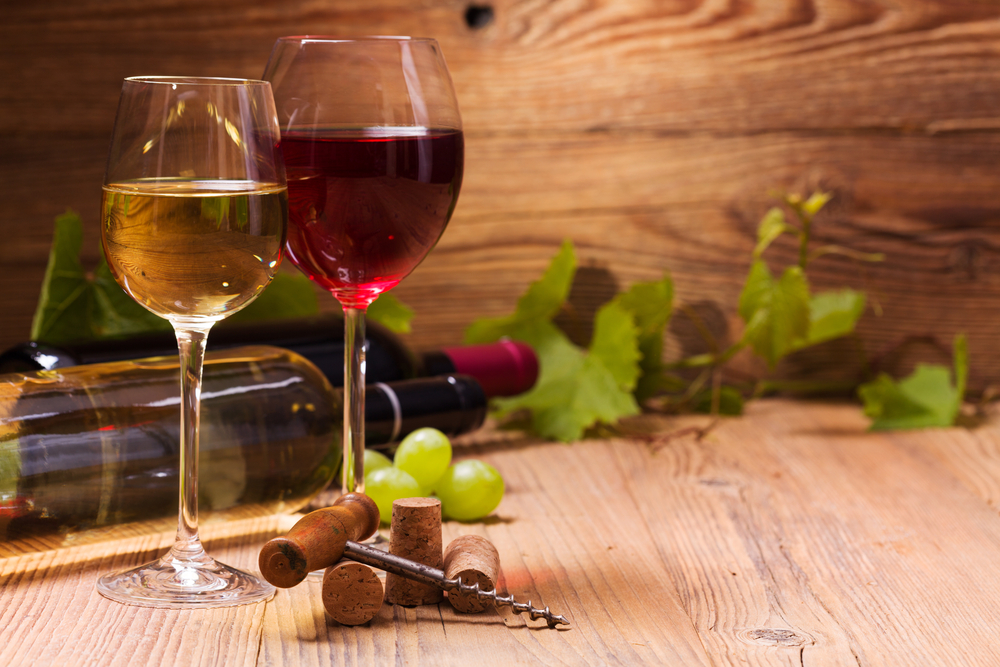
</div>

Equipe

- Daniel Rosa da Silva
- Luiz Massao Mukai
- Wilian da Silva Ricce

## Introdução:

### Estamos analizando os Vinhos para classificá-los de acordo com a meta de qualidade

Logo, não será necessária a análise individual de cada variável, mas sim daquelas que apresentam correlação com a qualidade do Vinho.

Se uma variável não está associada às respostas para as perguntas formuladas, não existindo uma relação, não faria sentido explorá-la.

O Cientista de Dados deve se pautar em elaborar perguntas pertinentes, e depois encontrar as repostas.

- Qual a Variável Meta?
- Quais variáveis influenciam a Qualidade do vinho?
- Quais variáveis apenas possuem funções técnicas que não interferem no sabor?
- Quais os parâmetros que determinam um vinho considerado 'BOM"?
- Porque existem outliers?
- Qual a causa de suas existências?

### HISTÓRICO
https://www.vinhoverde.pt/en/about-vinho-verde

‎‎Vinho verde‎‎ é um produto único da região do Minho (noroeste) de ‎‎Portugal.‎‎ Médio em álcool, é particularmente apreciado devido ao seu frescor (especialmente no verão).‎

Vinho Verde possui grande potencial de armazenamento e envelhecimento, complexo, intenso e com aromas e sabores minerais.

***Perfil Sensorial***

Os vinhos do Vinho Verde têm uma cor cítrica ou palha com aromas ricos, frutados e florais, dependendo das variedades de uvas que lhes dão origem. Na boca são harmoniosas, intensas e revelam grande frescor.

Os vinhos Vinhos Verde envelhecidos têm uma cor dourada, com aromas de frutas mais maduras, como quince e mel. Na boca, temos mais complexidade e estrutura, um rounder, plumper e vinho persistente.

Vinho Verde Rosé revela uma cor ligeiramente rosa ou intensa, aromas jovens e frescos, que lembram frutas vermelhas. O sabor é harmonioso, fresco e persistente.

Os Vinhos Verdes vermelhos têm uma cor vermelha intensa e, às vezes, espuma vermelha rosa ou brilhante e aroma vísmo, com ênfase em frutas silvestres. Na boca eles são frescos e intensos, muito gastronômicos.

O Vinho Verde Espumante mantém o perfil da degustação vinho verde, reforçando as características do frescor aromático, associado a maior complexidade do sabor. A preferência de consumo dita a escolha, desde um Espumante Brut Natural até um Espumante Doce, dependendo da concentração de açúcar residual, ou entre uma Reserva para a Grande Reserva, de acordo com o tempo de envelhecimento na garrafa.

### PARÂMETROS

**Variáveis de Entrada:** (Baseada em testes fisoco-químicos) - medidas em g / dm3:

**1 - fixed acidity:** Acidez fixa: quantidade de ácido tartárico no vinho.   
**2 - volatile acidity:** Acidez volátil: quantidade de ácido acético no vinho.    
**3 - citric acid:** Ácido cítrico: quantidade de ácido cítrico no vinho. Contribui para a crocância do vinho.  
**4 - residual sugar:** Açúcar residual: uma quantidade de açúcar que permanece no vinho após a fermentação.   
**5 - chloride:** Quantidade de cloreto de sódio (sal) no vinho.   
**6 - free sulfur dioxide** Dióxido de enxofre livre: quantidade de SO2 na forma livre.   
**7 - total sulfur dioxide** Dióxido de enxofre (SO2) total. Muito pode causar um cheiro forte. O SO2 atua como um agente antioxidante e antimicrobiano.    
**8 - density:** Densidade de Vinho. Próxima a da água.   
**9 - pH:** Escala de 0-14. **0** significa altamente ácido, enquanto **14** significa altamente básico. Normal entre 3 e 4.     
**10 - sulphates:** Quantidade de Sulfato de Potássio no vinho. Contribui para a formação de SO2.    
**11 - alcohol:** Teor de álcool no vinho (em termos de % de volume).


**Variável de Saída:** Baseada em dados sensoriais.  

**12 - quality (score between 0 and 10)** Qualidade do vinho avaliada em uma escala de 1 a 10 (quanto maior, melhor) 
0: Muito Ruim e 10:Muito Excelente  

---

In [115]:
# Bibliotecas utilizadas
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore") # ignorando os warnings


**Vamos importar o Dataset e dar uma primeira olhada nos dados e nos seus formatos.**

- Para isso prefiro usar a função **sample()** ao invés de head() ou tail()
- Depois verificamos a quantidade de suas Linhas e Colunas
- Visualização e confiemação de dados faltantes
- Localização e eliminação de dados duplicados no Dataset
- Resumo do Dataset com a função **describe()**

In [2]:
# Carregamento dos Datasets
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
# Testando se as colunas são semelhantes
red.columns == white.columns, white.columns == red.columns

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]))

In [4]:
# Adicionar coluna do tipo do vinho
red['type'] = 1
white['type'] = 2

In [104]:
# Concatenando os datasets
df = pd.concat([red, white], ignore_index=True)

In [7]:
#Amostra em Sample - para ter uma visão mais espalhada e aleatória dos dados
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2993            5.6              0.49         0.13             4.5      0.039   
4839            6.4              0.16         0.42             1.0      0.036   
4803            6.8              0.28         0.34             7.5      0.035   
1120            7.9              0.54         0.34             2.5      0.076   
1318            7.5              0.63         0.27             2.0      0.083   
369             9.4              0.27         0.53             2.4      0.074   
3248            6.9              0.26         0.49             1.6      0.058   
937            12.0              0.63         0.50             1.4      0.071   
4522            6.9              0.22         0.31             6.3      0.029   
5974            6.0              0.32         0.32             4.8      0.041   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2993                 17.0                 116.0  0.99070  3.42       0.90   
4839                 29.0                 113.0  0.99080  3.18       0.52   
4803                 34.0                 177.0  0.99692  3.33       0.43   
1120                  8.0                  17.0  0.99235  3.20       0.72   
1318                 17.0                  91.0  0.99616  3.26       0.58   
369                   6.0                  18.0  0.99620  3.20       1.13   
3248                 39.0                 166.0  0.99650  3.65       0.52   
937                   6.0                  26.0  0.99791  3.07       0.60   
4522                 41.0                 131.0  0.99326  3.08       0.49   
5974                 40.0                 186.0  0.99235  3.22       0.54   

      alcohol  quality  type  
2993     13.7        7     2  
4839     11.0        6     2  
4803      9.1        5     2  
1120     13.1        8     1  
1318      9.8        6     1  
369      12.0        7     1  
3248      9.4        4     2  
937      10.4        4     1  
4522     10.8        6     2  
5974     11.0        6     2

In [8]:
print('O Dataset possui:')
print(f'{df.shape[0]} Linhas \n{df.shape[1]} Colunas')

O Dataset possui:
6497 Linhas 
13 Colunas


<AxesSubplot:>

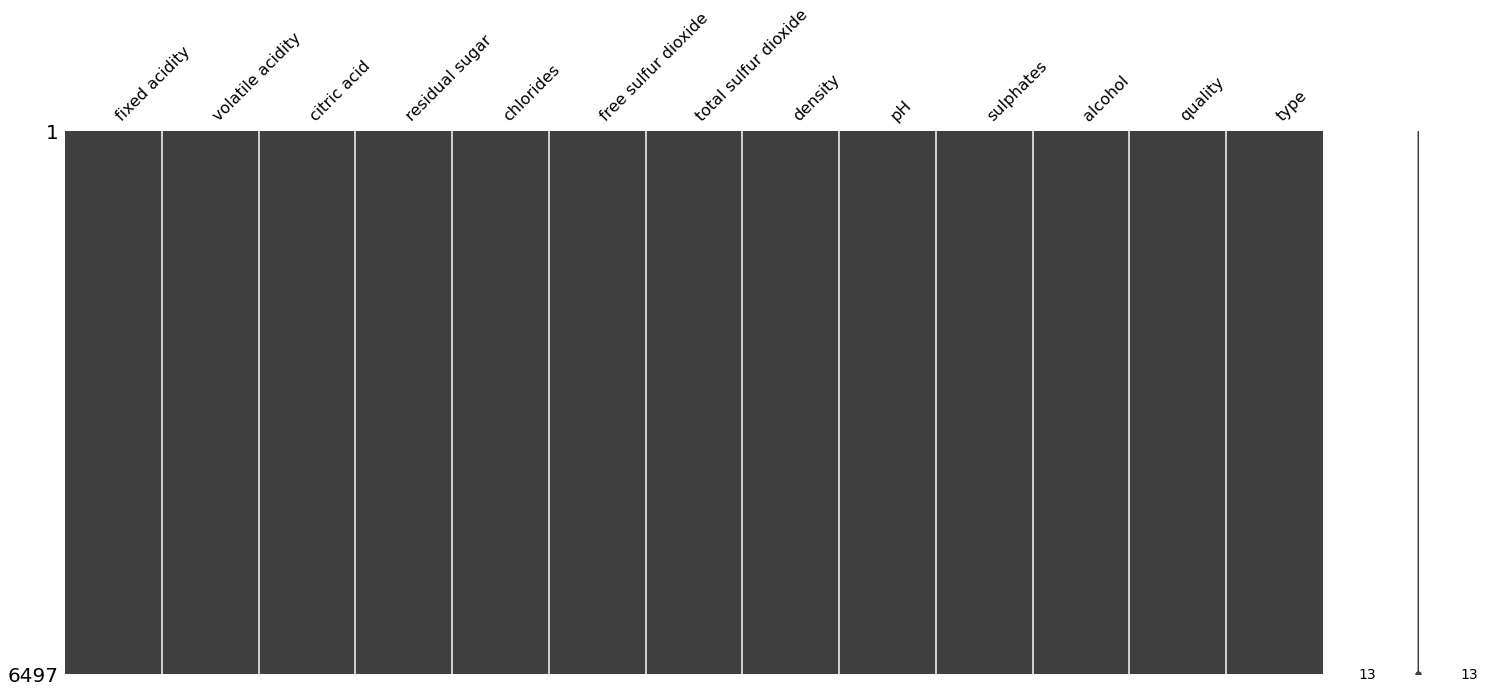

In [9]:
# Verificando a existência de dados faltantes graficamente
msno.matrix(df)

In [12]:
# Conferindo valores nulos
df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [10]:
# Variação de valores únicos de cada coluna
df.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64

In [25]:
#Verificar Duplicados - Retorno True indicam que há duplicadas. (df_vv.duplicated().sum())

df.duplicated().value_counts()

False    5320
True     1177
dtype: int64

In [26]:
#Visualização dde dados duplicados
df[df.duplicated(keep=False)].head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00            1.90      0.076   
4              7.4             0.700         0.00            1.90      0.076   
9              7.5             0.500         0.36            6.10      0.071   
11             7.5             0.500         0.36            6.10      0.071   
22             7.9             0.430         0.21            1.60      0.106   
27             7.9             0.430         0.21            1.60      0.106   
39             7.3             0.450         0.36            5.90      0.074   
40             7.3             0.450         0.36            5.90      0.074   
64             7.2             0.725         0.05            4.65      0.086   
65             7.2             0.725         0.05            4.65      0.086   
75             8.8             0.410         0.64            2.20      0.093   
76             8.8             0.410         0.64            2.20      0.093   
86             8.6             0.490         0.28            1.90      0.110   
87             7.7             0.490         0.26            1.90      0.062   
91             8.6             0.490         0.28            1.90      0.110   
93             7.7             0.490         0.26            1.90      0.062   
99             8.1             0.545         0.18            1.90      0.080   
102            8.1             0.545         0.18            1.90      0.080   
103            8.1             0.575         0.22            2.10      0.077   
105            8.1             0.575         0.22            2.10      0.077   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11.0                  34.0   0.9978  3.51       0.56   
4                   11.0                  34.0   0.9978  3.51       0.56   
9                   17.0                 102.0   0.9978  3.35       0.80   
11                  17.0                 102.0   0.9978  3.35       0.80   
22                  10.0                  37.0   0.9966  3.17       0.91   
27                  10.0                  37.0   0.9966  3.17       0.91   
39                  12.0                  87.0   0.9978  3.33       0.83   
40                  12.0                  87.0   0.9978  3.33       0.83   
64                   4.0                  11.0   0.9962  3.41       0.39   
65                   4.0                  11.0   0.9962  3.41       0.39   
75                   9.0                  42.0   0.9986  3.54       0.66   
76                   9.0                  42.0   0.9986  3.54       0.66   
86                  20.0                 136.0   0.9972  2.93       1.95   
87                   9.0                  31.0   0.9966  3.39       0.64   
91                  20.0                 136.0   0.9972  2.93       1.95   
93                   9.0                  31.0   0.9966  3.39       0.64   
99                  13.0                  35.0   0.9972  3.30       0.59   
102                 13.0                  35.0   0.9972  3.30       0.59   
103                 12.0                  65.0   0.9967  3.29       0.51   
105                 12.0                  65.0   0.9967  3.29       0.51   

     alcohol  quality  type  
0        9.4        5     1  
4        9.4        5     1  
9       10.5        5     1  
11      10.5        5     1  
22       9.5        5     1  
27       9.5        5     1  
39      10.5        5     1  
40      10.5        5     1  
64      10.9        5     1  
65      10.9        5     1  
75      10.5        5     1  
76      10.5        5     1  
86       9.9        6     1  
87       9.6        5     1  
91       9.9        6     1  
93       9.6        5     1  
99       9.0        6     1  
102      9.0        6     1  
103      9.2        5     1  
105      9.2        5     1

In [27]:
# Constatado a existencia de duplicados, partimos para eliminar os duplicados.
df.drop_duplicates(inplace=True)

In [28]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  type  
0         9.4        5     1  
1         9.8        5     1  
2         9.8        5     1  
3         9.8        6     1  
5         9.4        5     1  
...       ...      ...   ...  
6492     11.2        6     2  
6493      9.6        5     2  
6494      9.4        6     2  
6495     12.8        7     2  
6496     11.8        6     2  

[5320 rows x 13 columns]

---

### Etapa 1  
**EDA - Análise exploratória de dados**  

Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...  
Exclusão de outliers, caso necessário (sempre explicando a opção)  

In [32]:
# Visualuzação dos tipos de dados por coluna
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<font color='blue'   font size='4'> As variáves descritivas dos vinhos são do tipo float, somente as variáveis "quality"  e "type" são do tipo inteiro, como o esperado.
</font>

Como base para criar hipóteses e inferências sobre os dados, realizamos a EDA. 
Uma investigação para que se possa ter um resumo do que os dados podem nos dizer. 

A **média**, o **desvio padrão** e a **distribuição dos dados** são informações importantes para entender o comportamento de um Dataset.

In [37]:
# Resumo dos valores de posição e de dispersão por colunas
df_resumo = df.describe().T
df_resumo['amplitude'] = df.max() - df.min()

# Toda vez que quiservmos um resumo basta chamar este Dataframe
df_resumo

count        mean        std      min      25%  \
fixed acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000   5.0000   
type                  5320.0    1.744549   0.436155  1.00000   1.0000   

                            50%        75%        max  amplitude  
fixed acidity           7.00000    7.70000   15.90000   12.10000  
volatile acidity        0.30000    0.41000    1.58000    1.50000  
citric acid             0.31000    0.40000    1.66000    1.66000  
residual sugar          2.70000    7.50000   65.80000   65.20000  
chlorides               0.04700    0.06600    0.61100    0.60200  
free sulfur dioxide    28.00000   41.00000  289.00000  288.00000  
total sulfur dioxide  116.00000  153.25000  440.00000  434.00000  
density                 0.99465    0.99677    1.03898    0.05187  
pH                      3.21000    3.33000    4.01000    1.29000  
sulphates               0.51000    0.60000    2.00000    1.78000  
alcohol                10.40000   11.40000   14.90000    6.90000  
quality                 6.00000    6.00000    9.00000    6.00000  
type                    2.00000    2.00000    2.00000    1.00000

No Dataframe **df_resumo** temos os principais valores de posição e dispersão rapidamente.

Podemos notar alguns pontos importantes:
- A qualidade do vinho varia de **3** a **8**, sendo **6** a qualidade média.
- O nível máximo de álcool no vinho é **14,9** e o mínimo é **8.0**.
- O nível de pH do vinho varia entre **2,72** a **4,01**.
- A densidade média do vinho é de **0.99466**.
- O dióxido de enxofre total varia entre **6,0** a **289,0**.

A gente já consegue ver detalhes como que a média de **residual sugar** é de **5.049605** entretanto nesse caso a média não nos dá uma visão da realidade já que a mediana (50%) é **2.70000**, ou seja, metade do dataset tinha até 3 meses na adoção. 
u
Chama a atenção a variação de **residual sugar**, mínima: **0.60000** e  máxima: **65.20000**.

Número de vinhos por cada única nota de qualidade:

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64


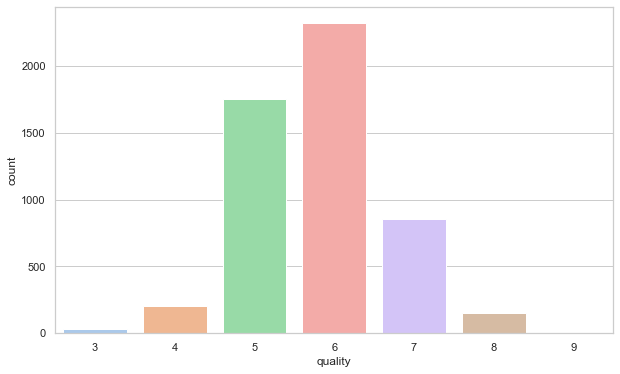

In [38]:
# Visualização da distribuição dos dados de qualidade

sns.set(style="whitegrid")
print('Número de vinhos por cada única nota de qualidade:')
print()
print(df['quality'].value_counts())

fig = plt.figure(figsize = (10,6))
sns.countplot(x='quality', data=df, palette='pastel')

plt.show() 

### Nota: 

Percebemos uma alta concentração da variável qualidade do vinho em **'5'** e **'6'**, sendo mais de 10 vezes maior do que **'3', '4'** e **'8'**. O que criará distorções na análise da qualidade do vinho. 

Como alternativa, também podemos subamostrar as categorias **'5'** e **'6'** e sobreamostrar as restantes. De qualquer forma, decidiremos isso mais tarde.

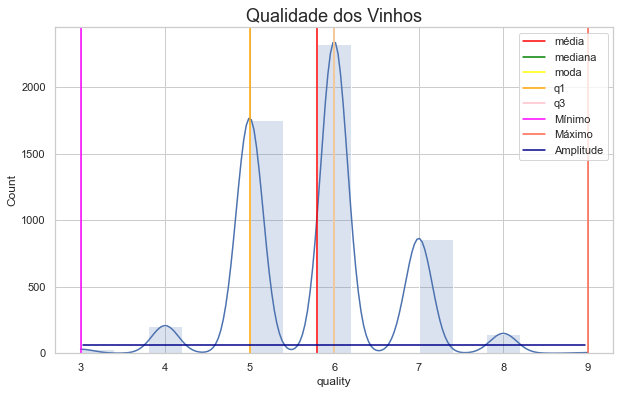

In [41]:
# Análise da Feature Qualidade - Medidas de posição e de dispersão

plt.figure(figsize=(10, 6))

plt.title("Qualidade dos Vinhos", size=18)

sns.histplot(df['quality'], kde=True, alpha=0.2, bins=15)
plt.axvline(df['quality'].mean(), color='red', label='média')
plt.axvline(df["quality"].median(), color="green", label="mediana")

for i in range(df["quality"].mode().shape[0]):
    plt.axvline(df["quality"].mode()[i], color="yellow", label="moda")

plt.axvline(df["quality"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["quality"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["quality"].min(), color="magenta", label="Mínimo")
plt.axvline(df["quality"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

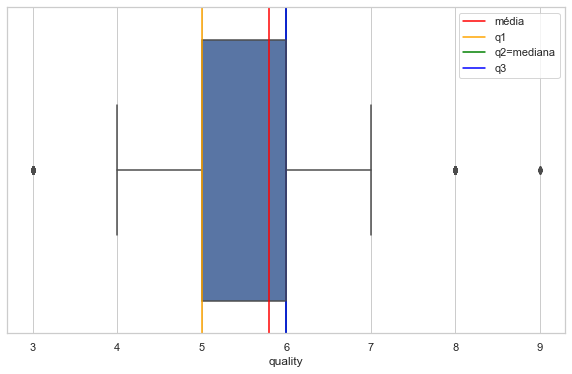

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df["quality"])

# plotando a media
plt.axvline(df['quality'].mean(), color='red', label='média')

# plotando a mediana
plt.axvline(df['quality'].quantile(0.25), color="orange", label="q1")
plt.axvline(df['quality'].quantile(0.5), color="green", label="q2=mediana")
plt.axvline(df['quality'].quantile(0.75), color="blue", label="q3")

plt.legend()

plt.show()

**Nota:**  
A Mediana e o 3º Quartil estão sobrepostos no gráfico.

In [123]:
# Moda na análise da qualidade dos vinhos
df['quality'].mode()

0    6
dtype: int64

### Sobre a Qualidade dos vinhos:

A Qualidade dos vinhos se situa com nota de qualidade entre uma faixa de mínimo igual a **3** e máximo de **9**.  

**3.331** vinhos tiveram nota maior que **Média**  
**1.008** vinhos tiveram nota maior que **Médiana**   
**2.323** vinhos localizam-se no valor da Moda de qualidade: **6**  

Poucos vinhos, **153** conseguiram se estabelecer em uma análise final acima de **7**.  

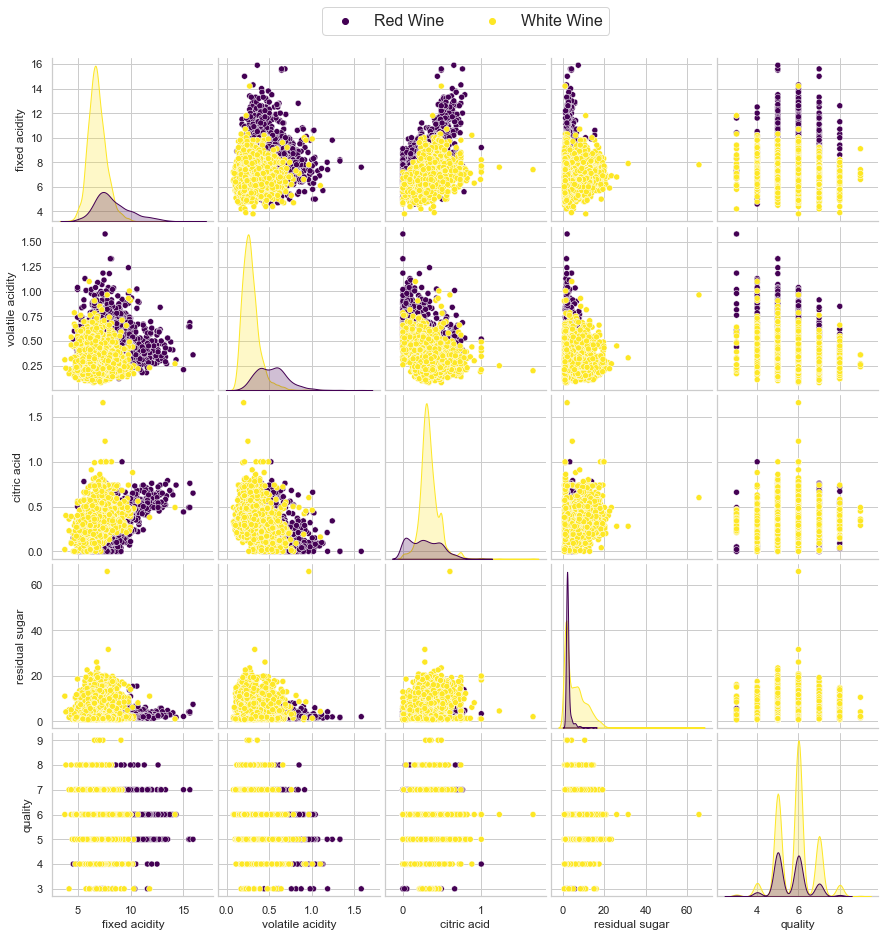

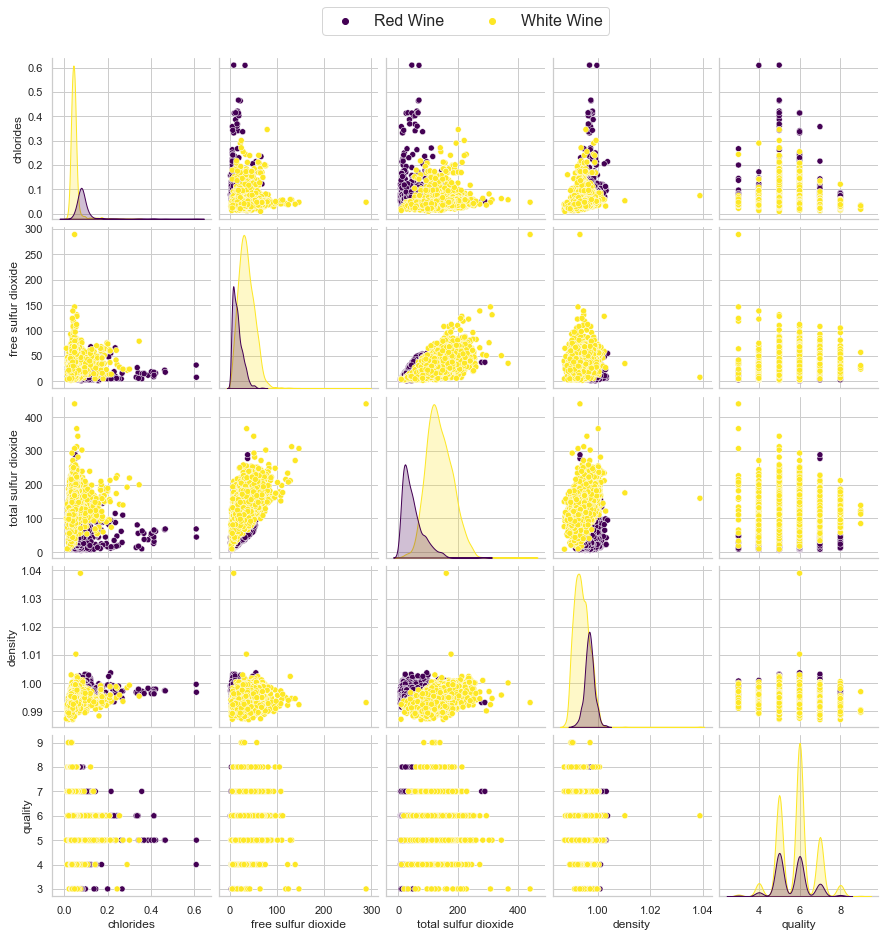

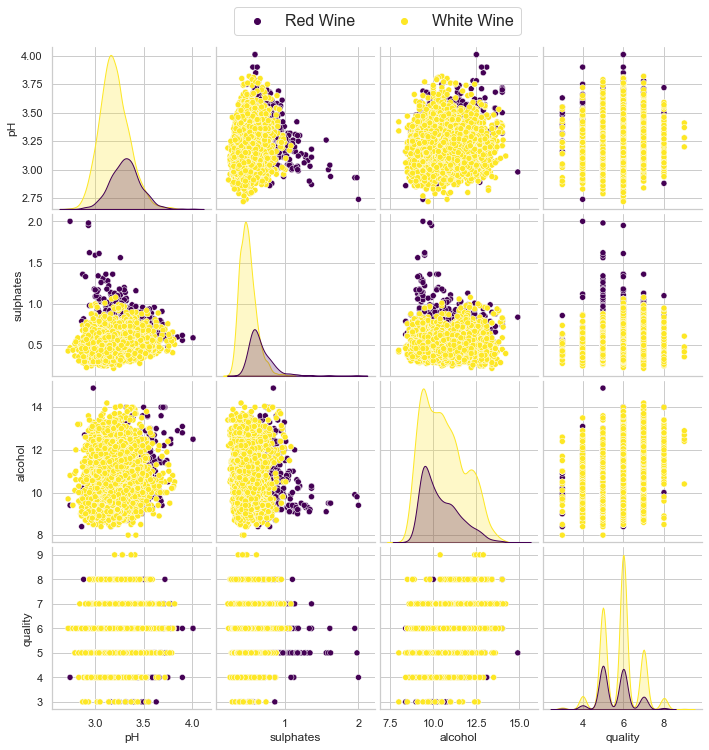

In [72]:
# Visualização da distribuição dos dados

# Tipo 1 = red e Tipo 2 = white

ax1 = sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality','type']], 
                   hue='type', palette='viridis')
ax1._legend.remove()

ax1.fig.legend(handles=ax1._legend_data.values(), labels=['Red Wine', 'White Wine'], loc='upper center', 
               ncol=2, labelspacing=10, fontsize=16, bbox_to_anchor=(0.5, 1.05))


ax2 = sns.pairplot(df[['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','quality','type']], 
                   hue='type', palette='viridis')
ax2._legend.remove()

ax2.fig.legend(handles=ax2._legend_data.values(), labels=['Red Wine', 'White Wine'], loc='upper center', 
               ncol=2, labelspacing=10, fontsize=16, bbox_to_anchor=(0.5, 1.05))

ax3 = sns.pairplot(df[['pH', 'sulphates', 'alcohol', 'quality','type']], hue='type', palette='viridis')

ax3._legend.remove()

ax3.fig.legend(handles=ax3._legend_data.values(), labels=['Red Wine', 'White Wine'], loc='upper center', 
               ncol=2, labelspacing=10, fontsize=16, bbox_to_anchor=(0.5, 1.05))



plt.show()

### Quais variáveis estão correlacionadas à Qualidade do Vinho?

Para nossas análises consideraremos apenas variáveis com correlações sifnificativas no método Pearson:   
$0.5 \leq |r| \leq 0.69$ indica uma correlação moderada  
$0 \leq |r| \leq 0.49$ indica uma correlação fraca

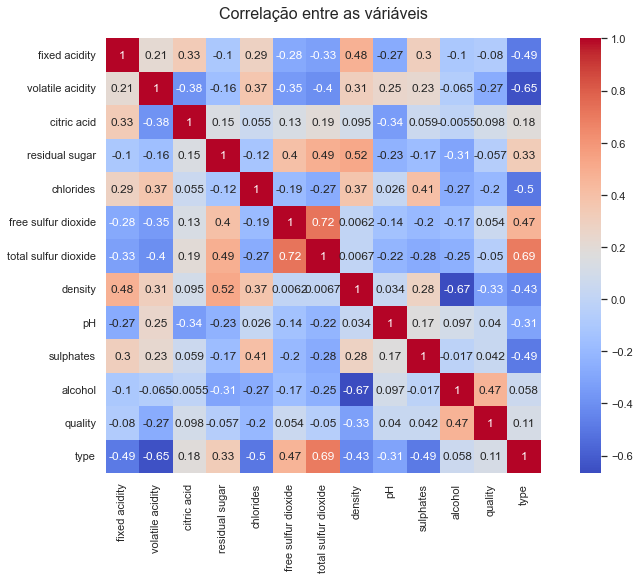

In [45]:
# visualização gráfica da correlação - mapa de calor

plt.figure(figsize=(14, 8))
plt.title('Correlação entre as váriáveis', pad=20, size=16)
sns.heatmap(df.corr(), square=True , annot = True, cmap='coolwarm' )
plt.show()


In [47]:
# Criando lista com as condições
df_q = df.corr(method='pearson')

conditions = [(abs(df_q['quality']) >= 0.0) & (abs(df_q['quality']) <= 0.49),
    (abs(df_q['quality']) >= 0.5) & (abs(df_q['quality']) <= 0.69),
    (abs(df_q['quality']) >= 0.7) & (abs(df_q['quality']) <= 1.0)]


# create a list of the values we want to assign for each condition
values = ['Fraca', 'Moderada', 'Forte']

# create a new column and use np.select to assign values to it using our lists as arguments
df_q['Correlação'] = np.select(conditions, values)

# display updated DataFrame
df_q

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.214752     0.330328   
volatile acidity           0.214752          1.000000    -0.384192   
citric acid                0.330328         -0.384192     1.000000   
residual sugar            -0.104439         -0.163696     0.146189   
chlorides                  0.288918          0.367626     0.055199   
free sulfur dioxide       -0.281590         -0.349039     0.130849   
total sulfur dioxide      -0.327471         -0.400716     0.194835   
density                    0.478180          0.308452     0.094758   
pH                        -0.271182          0.246687    -0.344735   
sulphates                  0.304844          0.227772     0.059183   
alcohol                   -0.102573         -0.065411    -0.005496   
quality                   -0.080092         -0.265205     0.097954   
type                      -0.486253         -0.645335     0.183759   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.104439   0.288918            -0.281590   
volatile acidity           -0.163696   0.367626            -0.349039   
citric acid                 0.146189   0.055199             0.130849   
residual sugar              1.000000  -0.123094             0.398717   
chlorides                  -0.123094   1.000000            -0.186615   
free sulfur dioxide         0.398717  -0.186615             1.000000   
total sulfur dioxide        0.487519  -0.269817             0.720488   
density                     0.520930   0.371867             0.006166   
pH                         -0.234522   0.025823            -0.141747   
sulphates                  -0.174717   0.405051            -0.198244   
alcohol                    -0.305242  -0.269601            -0.170012   
quality                    -0.056830  -0.202137             0.054002   
type                        0.328695  -0.499517             0.465326   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.327471  0.478180 -0.271182   0.304844   
volatile acidity                 -0.400716  0.308452  0.246687   0.227772   
citric acid                       0.194835  0.094758 -0.344735   0.059183   
residual sugar                    0.487519  0.520930 -0.234522  -0.174717   
chlorides                        -0.269817  0.371867  0.025823   0.405051   
free sulfur dioxide               0.720488  0.006166 -0.141747  -0.198244   
total sulfur dioxide              1.000000  0.006711 -0.222956  -0.275836   
density                           0.006711  1.000000  0.034273   0.282690   
pH                               -0.222956  0.034273  1.000000   0.168150   
sulphates                        -0.275836  0.282690  0.168150   1.000000   
alcohol                          -0.249004 -0.667811  0.097314  -0.017232   
quality                          -0.050296 -0.326434  0.039733   0.041884   
type                              0.694229 -0.429377 -0.310919  -0.490364   

                       alcohol   quality      type Correlação  
fixed acidity        -0.102573 -0.080092 -0.486253      Fraca  
volatile acidity     -0.065411 -0.265205 -0.645335      Fraca  
citric acid          -0.005496  0.097954  0.183759      Fraca  
residual sugar       -0.305242 -0.056830  0.328695      Fraca  
chlorides            -0.269601 -0.202137 -0.499517      Fraca  
free sulfur dioxide  -0.170012  0.054002  0.465326      Fraca  
total sulfur dioxide -0.249004 -0.050296  0.694229      Fraca  
density              -0.667811 -0.326434 -0.429377      Fraca  
pH                    0.097314  0.039733 -0.310919      Fraca  
sulphates            -0.017232  0.041884 -0.490364      Fraca  
alcohol               1.000000  0.469422  0.057756      Fraca  
quality               0.469422  1.000000  0.114809      Forte  
type                  0.057756  0.114809  1.000000      Fraca

In [48]:
# Correlações Fracas
print()
print('Variáveis de Correlação Fraca:')
df_corF = pd.DataFrame(df_q[(abs(df_q['quality']) >= 0.0) & (abs(df_q['quality']) <= 0.49)]['quality'])

df_corF.sort_values(ascending=False, by='quality')


Variáveis de Correlação Fraca:


quality
alcohol               0.469422
type                  0.114809
citric acid           0.097954
free sulfur dioxide   0.054002
sulphates             0.041884
pH                    0.039733
total sulfur dioxide -0.050296
residual sugar       -0.056830
fixed acidity        -0.080092
chlorides            -0.202137
volatile acidity     -0.265205
density              -0.326434

In [49]:
df_corF['quality'].sort_values(ascending=False)

alcohol                 0.469422
type                    0.114809
citric acid             0.097954
free sulfur dioxide     0.054002
sulphates               0.041884
pH                      0.039733
total sulfur dioxide   -0.050296
residual sugar         -0.056830
fixed acidity          -0.080092
chlorides              -0.202137
volatile acidity       -0.265205
density                -0.326434
Name: quality, dtype: float64

### Correlação pelo método Spearman

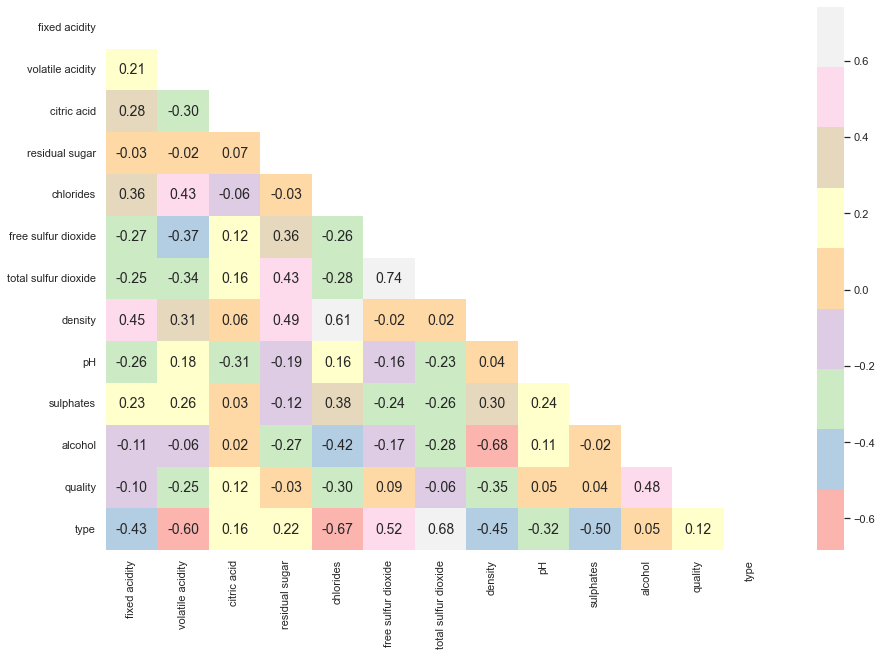

In [50]:
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, annot_kws={'size':14}, 
            fmt='.2f', cmap='Pastel1',
            mask=np.triu(corr_matrix))
plt.show()

### O gráfico abaixo mostra de maneira mais direta a relação das variáveis de entrada com a qualidade:

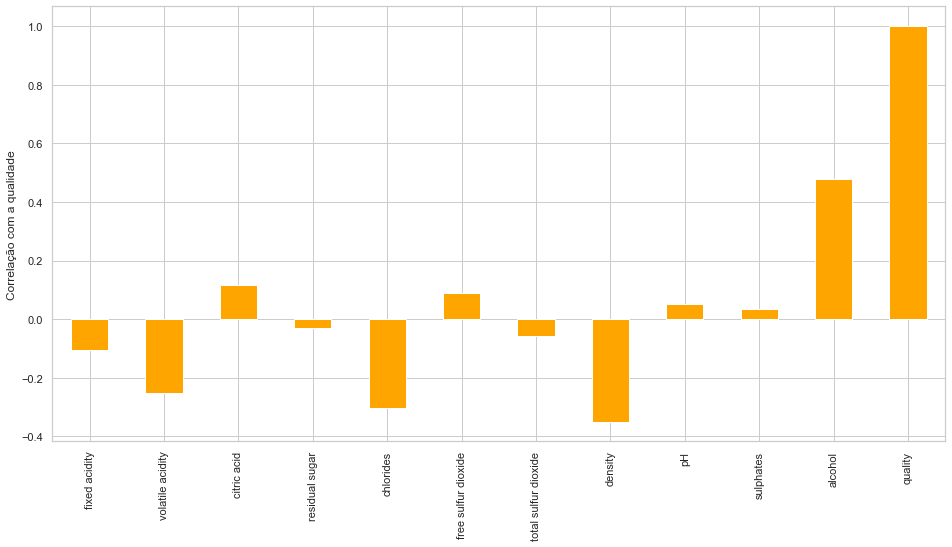

In [51]:
corr_matrix['quality'][:-1].plot.bar(color='orange', figsize=(16,8))
plt.ylabel("Correlação com a qualidade")
plt.show()

### Resultado das correlações

Todas as variáveis possuem correlações fracas com a Qualidade.

As colunas mais prováveis de influenciarem na qualidade do vinho são as colunas:
 Alcohol, Sulphates, Volatile acidity have the highest correlations.

Sendo as com maiores relações:

**POSITIVAS:**  

Alcohhol: 0.469216  
citric acid: 0.097926  
free sulfur dioxide: 0.054199  

**NEGATIVAS**  
density: -0.326301  
volatile acidity: -0.265354  
chlorides:	-0.201960  

## Análise das principais features

## POSITIVAS:

## Álcool

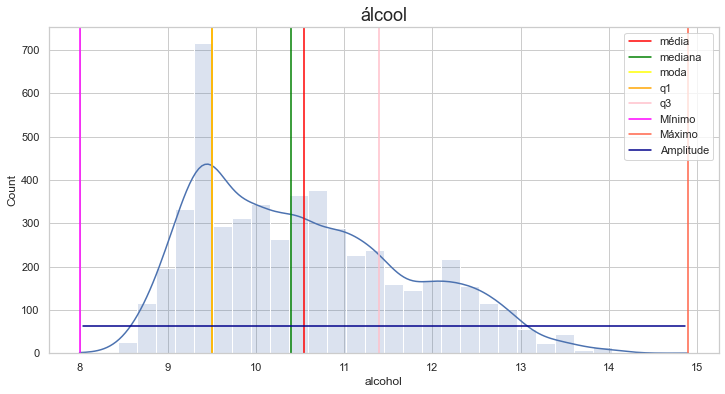

In [52]:
plt.figure(figsize=(12, 6))

plt.title("álcool", size=18)

sns.histplot(df['alcohol'], kde=True, alpha=0.2)

plt.axvline(df['alcohol'].mean(), color='red', label='média')

plt.axvline(df["alcohol"].median(), color="green", label="mediana")

for i in range(df["alcohol"].mode().shape[0]):
    plt.axvline(df["alcohol"].mode()[i], color="yellow", label="moda")

plt.axvline(df["alcohol"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["alcohol"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["alcohol"].min(), color="magenta", label="Mínimo")
plt.axvline(df["alcohol"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

Outliers alcohol

q1: 9.5
q3: 11.4

média: 10.54924122807021
mediana: 10.4

IQR: 1.9000000000000004


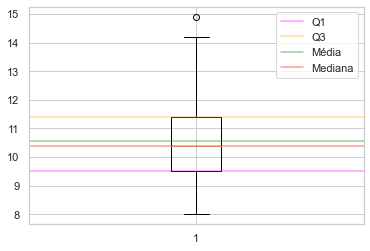

In [53]:
print("Outliers alcohol")
print("\nq1:",np.quantile(df["alcohol"], 0.25))
print("q3:",np.quantile(df["alcohol"], 0.75))
print("\nmédia:",np.mean(df["alcohol"]))
print("mediana:",np.median(df["alcohol"]))

# Calcula o intervalo interquartil
iqr = np.quantile(df["alcohol"], 0.75) - np.quantile(df["alcohol"], 0.25)

# Print do IQR
print("\nIQR:", iqr)

plt.boxplot(df["alcohol"], meanline=False)
plt.axhline(np.quantile(df["alcohol"], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axhline(np.quantile(df["alcohol"], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axhline(np.mean(df["alcohol"]), color="green", label="Média", alpha=0.4)
plt.axhline(np.median(df["alcohol"]), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

In [54]:
# Variância e Assimetria (alcohol)

print("Variância :", df['alcohol'].var())
print("Assimetria :", df['alcohol'].skew())
assimetria = df['alcohol'].skew()
if assimetria > 0:
    print("Assimetria positiva")
elif assimetria < 0:
    print("Assimetria negativa")
else:
    print("Distribição simétrica")

Variância : 1.4064369103176464
Assimetria : 0.545695978384562
Assimetria positiva


C:\Users\Avell\Anaconda3\envs\geo\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


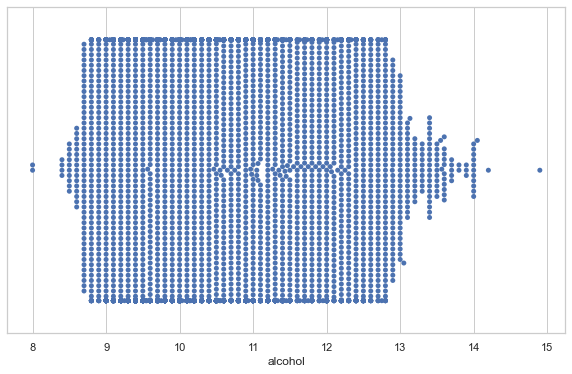

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x=df["alcohol"])

## Ácido Cítrico

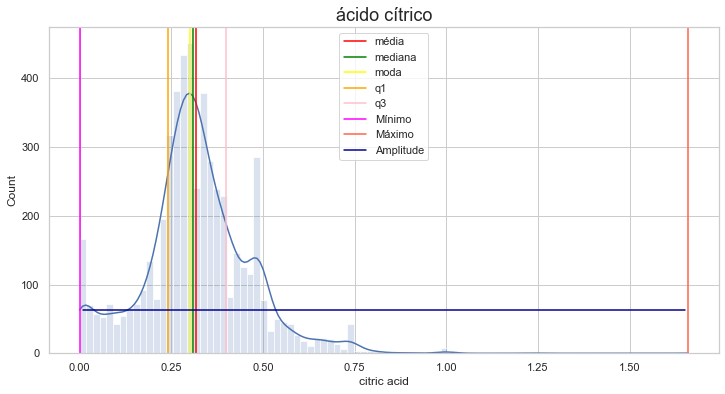

In [56]:
plt.figure(figsize=(12, 6))

plt.title("ácido cítrico", size=18)

sns.histplot(df['citric acid'], kde=True, alpha=0.2)

plt.axvline(df['citric acid'].mean(), color='red', label='média')

plt.axvline(df["citric acid"].median(), color="green", label="mediana")

for i in range(df["citric acid"].mode().shape[0]):
    plt.axvline(df["citric acid"].mode()[i], color="yellow", label="moda")

plt.axvline(df["citric acid"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["citric acid"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["citric acid"].min(), color="magenta", label="Mínimo")
plt.axvline(df["citric acid"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

Outliers citric acid

q1: 0.24
q3: 0.4

média: 0.3184943609022493
mediana: 0.31

IQR: 0.16000000000000003


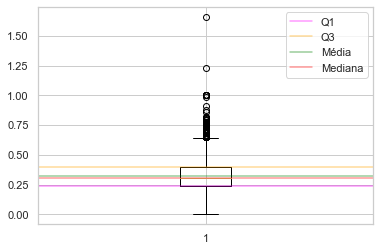

In [57]:
print("Outliers citric acid")
print("\nq1:",np.quantile(df["citric acid"], 0.25))
print("q3:",np.quantile(df["citric acid"], 0.75))
print("\nmédia:",np.mean(df["citric acid"]))
print("mediana:",np.median(df["citric acid"]))

# Calcula o intervalo interquartil
iqr = np.quantile(df["citric acid"], 0.75) - np.quantile(df["citric acid"], 0.25)

# Print do IQR
print("\nIQR:", iqr)

plt.boxplot(df["citric acid"], meanline=False)
plt.axhline(np.quantile(df["citric acid"], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axhline(np.quantile(df["citric acid"], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axhline(np.mean(df["citric acid"]), color="green", label="Média", alpha=0.4)
plt.axhline(np.median(df["citric acid"]), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

C:\Users\Avell\Anaconda3\envs\geo\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


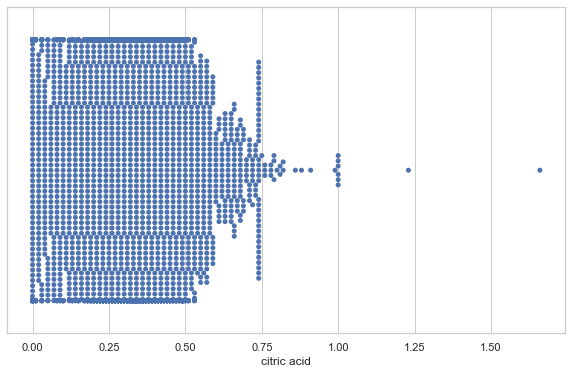

In [58]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x=df["citric acid"])

In [59]:
# Variância e Assimetria (citric acid)

print("Variância :", df['citric acid'].var())
print("Assimetria :", df['citric acid'].skew())
assimetria = df['citric acid'].skew()
if assimetria > 0:
    print("Assimetria positiva")
elif assimetria < 0:
    print("Assimetria negativa")
else:
    print("Distribição simétrica")

Variância : 0.021655281036065187
Assimetria : 0.48430902797982095
Assimetria positiva


## Dióxido de Enxofre livre

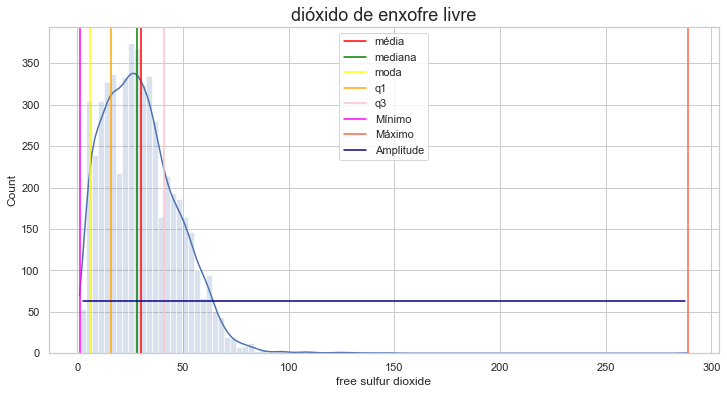

In [60]:
plt.figure(figsize=(12, 6))

plt.title("dióxido de enxofre livre", size=18)

sns.histplot(df['free sulfur dioxide'], kde=True, alpha=0.2)

plt.axvline(df['free sulfur dioxide'].mean(), color='red', label='média')

plt.axvline(df["free sulfur dioxide"].median(), color="green", label="mediana")

for i in range(df["free sulfur dioxide"].mode().shape[0]):
    plt.axvline(df["free sulfur dioxide"].mode()[i], color="yellow", label="moda")

plt.axvline(df["free sulfur dioxide"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["free sulfur dioxide"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["free sulfur dioxide"].min(), color="magenta", label="Mínimo")
plt.axvline(df["free sulfur dioxide"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

Outliers free sulfur dioxide

q1: 16.0
q3: 41.0

média: 30.036654135338345
mediana: 28.0

IQR: 25.0


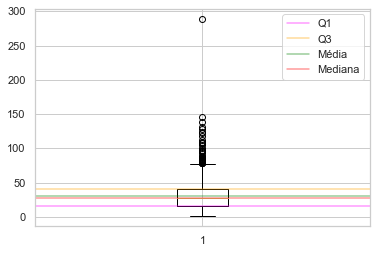

In [61]:
print("Outliers free sulfur dioxide")
print("\nq1:",np.quantile(df["free sulfur dioxide"], 0.25))
print("q3:",np.quantile(df["free sulfur dioxide"], 0.75))
print("\nmédia:",np.mean(df["free sulfur dioxide"]))
print("mediana:",np.median(df["free sulfur dioxide"]))

# Calcula o intervalo interquartil
iqr = np.quantile(df["free sulfur dioxide"], 0.75) - np.quantile(df["free sulfur dioxide"], 0.25)

# Print do IQR
print("\nIQR:", iqr)

plt.boxplot(df["free sulfur dioxide"], meanline=False)
plt.axhline(np.quantile(df["free sulfur dioxide"], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axhline(np.quantile(df["free sulfur dioxide"], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axhline(np.mean(df["free sulfur dioxide"]), color="green", label="Média", alpha=0.4)
plt.axhline(np.median(df["free sulfur dioxide"]), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

In [62]:
# Variância e Assimetria (free sulfur dioxide)

print("Variância :", df['free sulfur dioxide'].var())
print("Assimetria :", df['free sulfur dioxide'].skew())
assimetria = df['free sulfur dioxide'].skew()
if assimetria > 0:
    print("Assimetria positiva")
elif assimetria < 0:
    print("Assimetria negativa")
else:
    print("Distribição simétrica")

Variância : 317.0196188087288
Assimetria : 1.3627194619464467
Assimetria positiva


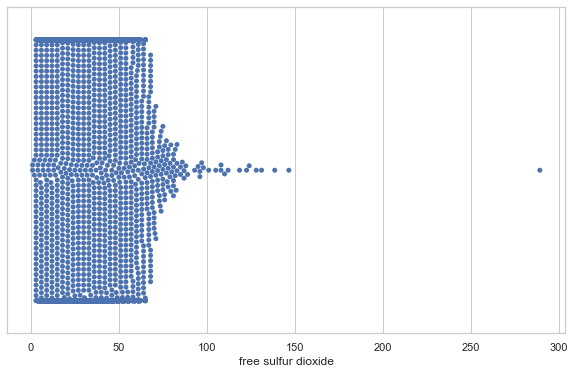

In [161]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x=df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

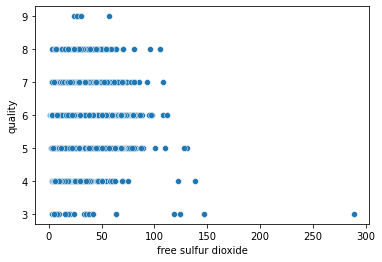

In [10]:
sns.scatterplot(data=df, x='free sulfur dioxide', y='quality')

## NEGATIVAS:

## Densidade

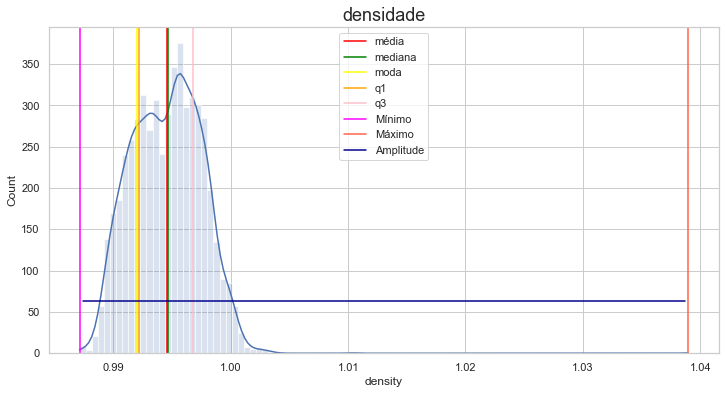

In [63]:
plt.figure(figsize=(12, 6))

plt.title("densidade", size=18)

sns.histplot(df['density'], kde=True, alpha=0.2)

plt.axvline(df['density'].mean(), color='red', label='média')

plt.axvline(df["density"].median(), color="green", label="mediana")

for i in range(df["density"].mode().shape[0]):
    plt.axvline(df["density"].mode()[i], color="yellow", label="moda")

plt.axvline(df["density"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["density"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["density"].min(), color="magenta", label="Mínimo")
plt.axvline(df["density"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

Outliers density

q1: 0.9922
q3: 0.99677

média: 0.9945362429484703
mediana: 0.99466

IQR: 0.004570000000000074


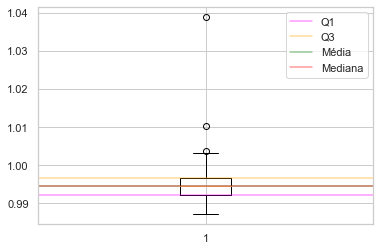

In [175]:
print("Outliers density")
print("\nq1:",np.quantile(df["density"], 0.25))
print("q3:",np.quantile(df["density"], 0.75))
print("\nmédia:",np.mean(df["density"]))
print("mediana:",np.median(df["density"]))

# Calcula o intervalo interquartil
iqr = np.quantile(df["density"], 0.75) - np.quantile(df["density"], 0.25)

# Print do IQR
print("\nIQR:", iqr)

plt.boxplot(df["density"], meanline=False)
plt.axhline(np.quantile(df["density"], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axhline(np.quantile(df["density"], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axhline(np.mean(df["density"]), color="green", label="Média", alpha=0.4)
plt.axhline(np.median(df["density"]), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

In [176]:
# Variância e Assimetria (density)

print("Variância :", df['density'].var())
print("Assimetria :", df['density'].skew())
assimetria = df['density'].skew()
if assimetria > 0:
    print("Assimetria positiva")
elif assimetria < 0:
    print("Assimetria negativa")
else:
    print("Distribição simétrica")

Variância : 8.794435449334357e-06
Assimetria : 0.6660333552745251
Assimetria positiva


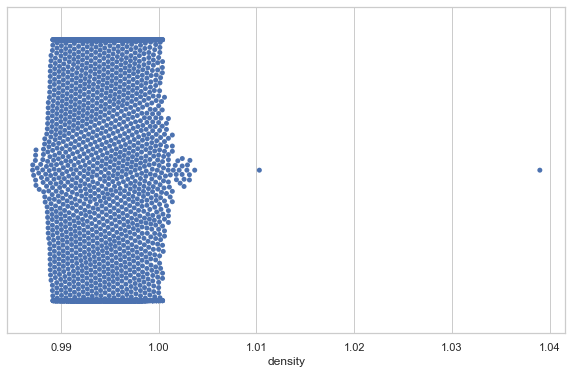

In [184]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x=df['density'])

## Ácidez Volátil

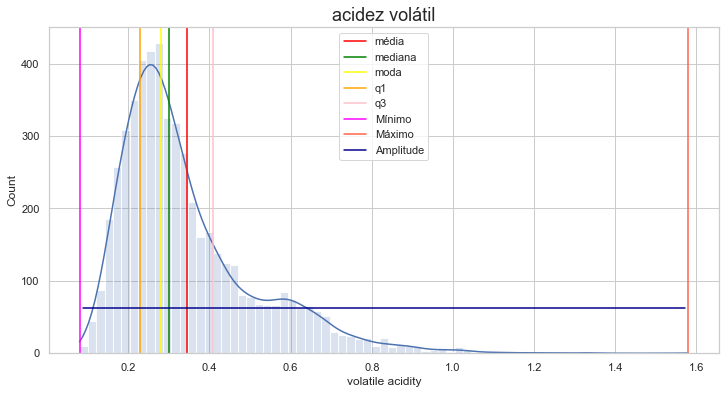

In [178]:
plt.figure(figsize=(12, 6))

plt.title("acidez volátil", size=18)

sns.histplot(df['volatile acidity'], kde=True, alpha=0.2)

plt.axvline(df['volatile acidity'].mean(), color='red', label='média')

plt.axvline(df["volatile acidity"].median(), color="green", label="mediana")

for i in range(df["volatile acidity"].mode().shape[0]):
    plt.axvline(df["volatile acidity"].mode()[i], color="yellow", label="moda")

plt.axvline(df["volatile acidity"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["volatile acidity"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["volatile acidity"].min(), color="magenta", label="Mínimo")
plt.axvline(df["volatile acidity"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

Outliers Acidez volátil

q1: 0.23
q3: 0.41

média: 0.3441707408800322
mediana: 0.3

IQR: 0.17999999999999997


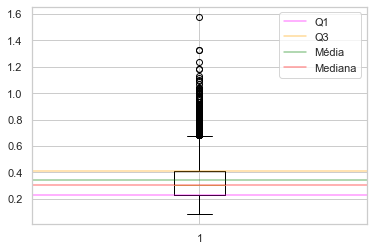

In [179]:
print("Outliers Acidez volátil")
print("\nq1:",np.quantile(df["volatile acidity"], 0.25))
print("q3:",np.quantile(df["volatile acidity"], 0.75))
print("\nmédia:",np.mean(df["volatile acidity"]))
print("mediana:",np.median(df["volatile acidity"]))

# Calcula o intervalo interquartil
iqr = np.quantile(df["volatile acidity"], 0.75) - np.quantile(df["volatile acidity"], 0.25)

# Print do IQR
print("\nIQR:", iqr)

plt.boxplot(df["volatile acidity"], meanline=False)
plt.axhline(np.quantile(df["volatile acidity"], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axhline(np.quantile(df["volatile acidity"], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axhline(np.mean(df["volatile acidity"]), color="green", label="Média", alpha=0.4)
plt.axhline(np.median(df["volatile acidity"]), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

In [180]:
# Variância e Assimetria (Acidez volátil)

print("Variância :", df['volatile acidity'].var())
print("Assimetria :", df['volatile acidity'].skew())
assimetria = df['volatile acidity'].skew()
if assimetria > 0:
    print("Assimetria positiva")
elif assimetria < 0:
    print("Assimetria negativa")
else:
    print("Distribição simétrica")

Variância : 0.02831288188212853
Assimetria : 1.5041154032533441
Assimetria positiva


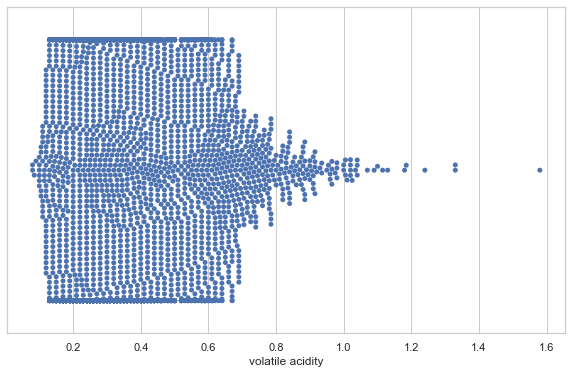

In [183]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x=df['volatile acidity'])

## Cloretos

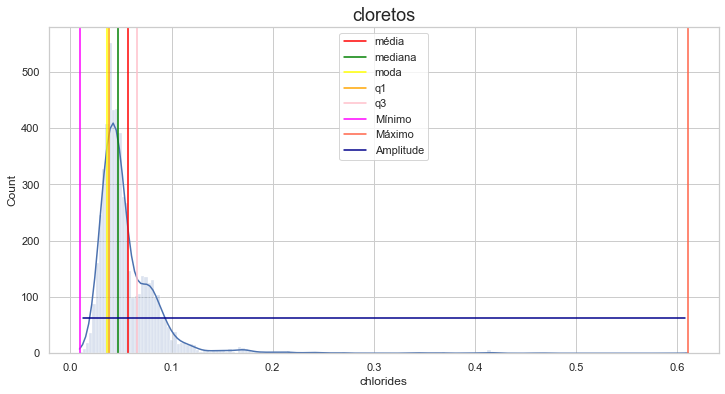

In [195]:
plt.figure(figsize=(12, 6))
plt.title("cloretos", size=18)

sns.histplot(df['chlorides'], kde=True, alpha=0.2)

plt.axvline(df['chlorides'].mean(), color='red', label='média')

plt.axvline(df["chlorides"].median(), color="green", label="mediana")

for i in range(df["chlorides"].mode().shape[0]):
    plt.axvline(df["chlorides"].mode()[i], color="yellow", label="moda")

plt.axvline(df["chlorides"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["chlorides"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["chlorides"].min(), color="magenta", label="Mínimo")
plt.axvline(df["chlorides"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

Outliers chlorides

q1: 0.038
q3: 0.066

média: 0.05670045129747965
mediana: 0.047

IQR: 0.028000000000000004


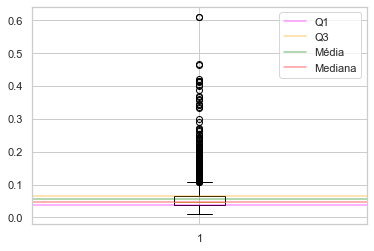

In [193]:
print("Outliers chlorides")
print("\nq1:",np.quantile(df["chlorides"], 0.25))
print("q3:",np.quantile(df["chlorides"], 0.75))
print("\nmédia:",np.mean(df["chlorides"]))
print("mediana:",np.median(df["chlorides"]))

# Calcula o intervalo interquartil
iqr = np.quantile(df["chlorides"], 0.75) - np.quantile(df["chlorides"], 0.25)

# Print do IQR
print("\nIQR:", iqr)

plt.boxplot(df["chlorides"], meanline=False)
plt.axhline(np.quantile(df["chlorides"], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axhline(np.quantile(df["chlorides"], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axhline(np.mean(df["chlorides"]), color="green", label="Média", alpha=0.4)
plt.axhline(np.median(df["chlorides"]), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

In [194]:
# Variância e Assimetria (chlorides)

print("Variância :", df['chlorides'].var())
print("Assimetria :", df['chlorides'].skew())
assimetria = df['chlorides'].skew()
if assimetria > 0:
    print("Assimetria positiva")
elif assimetria < 0:
    print("Assimetria negativa")
else:
    print("Distribição simétrica")

Variância : 0.001359013695489345
Assimetria : 5.3390771213992325
Assimetria positiva


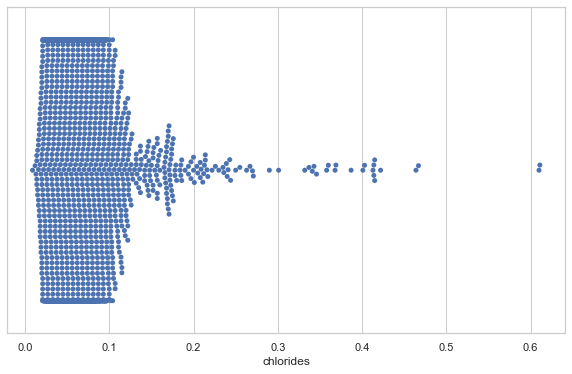

In [182]:
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x=df['chlorides'])

---

### Análise da Assimetria da Distribuição de Dados

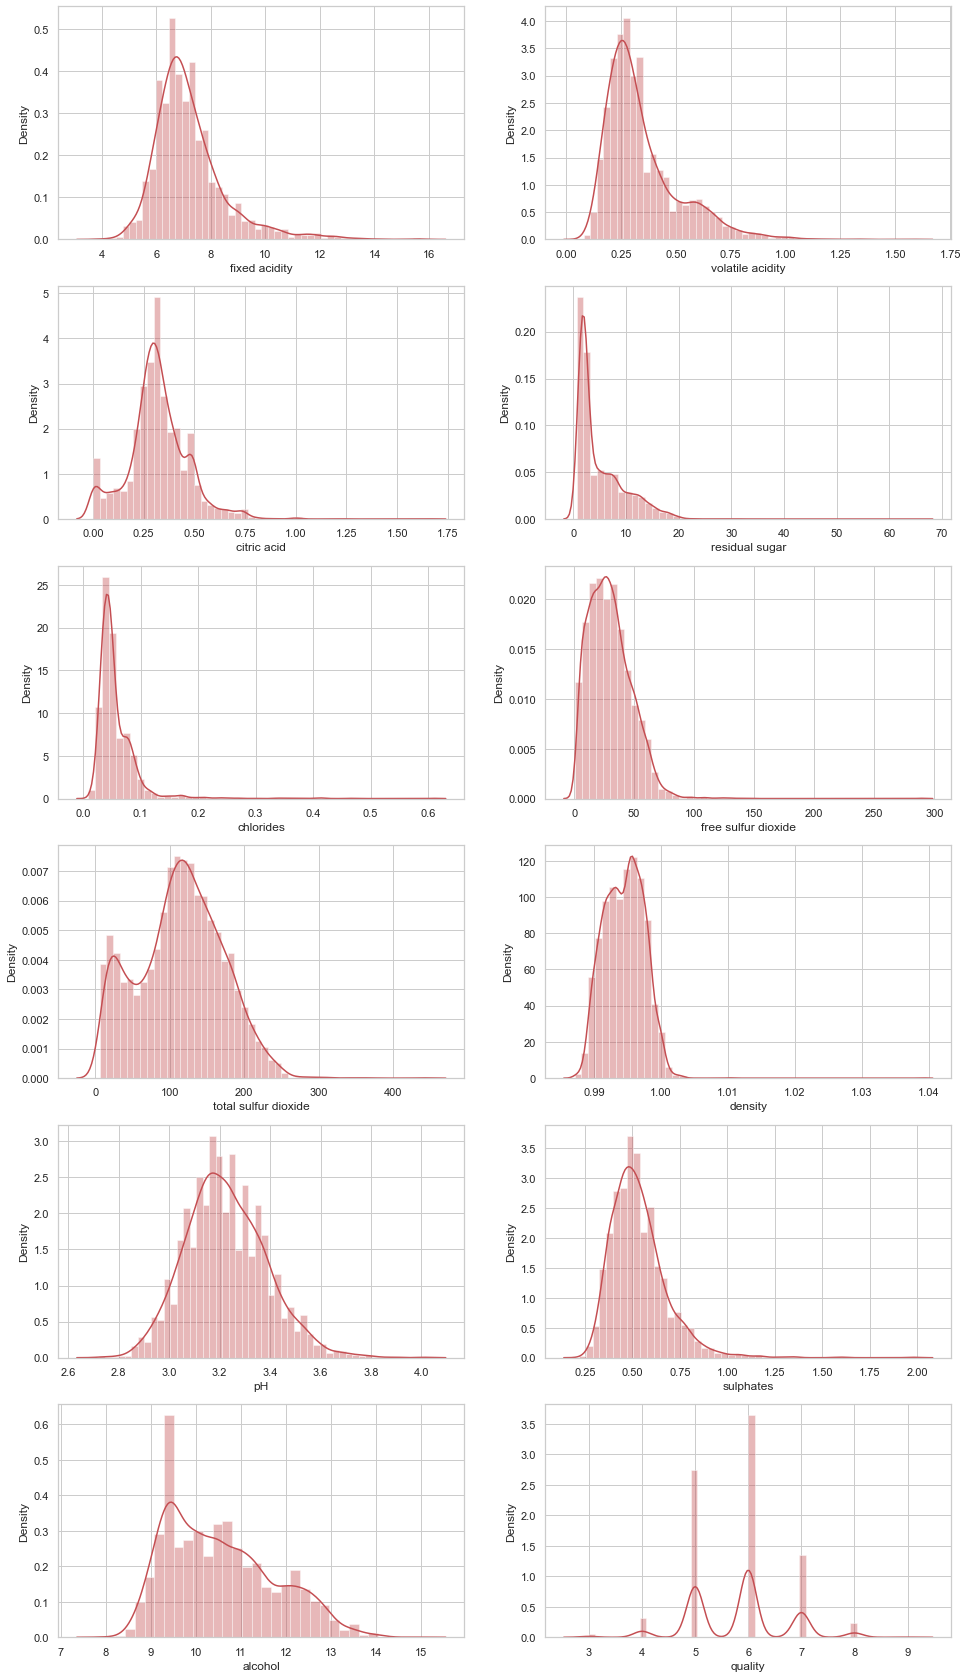

In [66]:
color = sns.color_palette('deep') #deep, muted, bright, pastel, dark, colorblind

fig, ax1 = plt.subplots(6,2, figsize=(16,30))
k = 0
columns = list(df.columns)
for i in range(6):
    for j in range(2):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'r')
            k += 1
plt.show()

**Notas:**  
As colunas "Residual Sugar", "Chlorides", "Free Sulphur Dioxide", "Total Sulphur Dioxide", e "Sulphates" estão com assimetria para a direita.

Mais a frente precisaria alguma forma de correção ?


---

### Medidas de dispersão

Vamos observar os valores Mínimo, Máximo e a Amplitude dos dados.

In [67]:
# no dataset df
amostra = df['quality']

print(df['quality'].min())

print(df['quality'].max())

print(df['quality'].max() - df['quality'].min())

print("\nMínimo:", np.min(amostra))
print("\nMáximo:", np.max(amostra))
print("\nAmplitude:", amostra.max() - amostra.min())

3
9
6

Mínimo: 3

Máximo: 9

Amplitude: 6


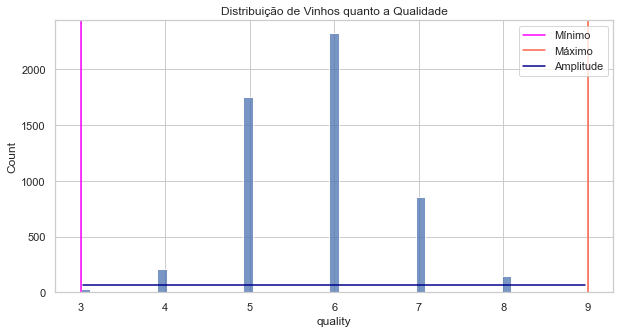

In [68]:
# Na representação gráfica

plt.figure(figsize=(10, 5))

sns.histplot(df['quality'])

# plotando a mediana
plt.axvline(df['quality'].min(), color="magenta", label="Mínimo")
plt.axvline(df['quality'].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.title('Distribuição de Vinhos quanto a Qualidade')

# Cria uma legenda
plt.legend()

plt.show()

---

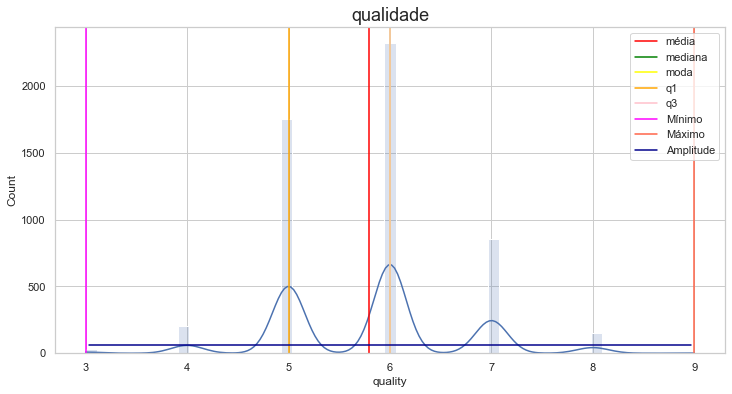

In [69]:
plt.figure(figsize=(12, 6))

plt.title("qualidade", size=18)

sns.histplot(df['quality'], kde=True, alpha=0.2)

plt.axvline(df['quality'].mean(), color='red', label='média')

plt.axvline(df["quality"].median(), color="green", label="mediana")

for i in range(df["quality"].mode().shape[0]):
    plt.axvline(df["quality"].mode()[i], color="yellow", label="moda")

plt.axvline(df["quality"].quantile(0.25), color="orange", label="q1")
plt.axvline(df["quality"].quantile(0.75), color="pink", label="q3")

plt.axvline(df["quality"].min(), color="magenta", label="Mínimo")
plt.axvline(df["quality"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.legend()
plt.show()

---

### Os Outliers

Constata a presença de vinhos com qualidade muito acima da média e outros muito abaixo da média.

In [201]:
df_resumo

count        mean     median        std      min  \
fixed acidity         5318.0    7.215523    7.00000   1.319777  3.80000   
volatile acidity      5318.0    0.344171    0.30000   0.168264  0.08000   
citric acid           5318.0    0.318522    0.31000   0.147177  0.00000   
residual sugar        5318.0    5.049605    2.70000   4.500645  0.60000   
chlorides             5318.0    0.056700    0.04700   0.036865  0.00900   
free sulfur dioxide   5318.0   30.030463   28.00000  17.804365  1.00000   
total sulfur dioxide  5318.0  114.107747  116.00000  56.783848  6.00000   
density               5318.0    0.994536    0.99466   0.002966  0.98711   
pH                    5318.0    3.224639    3.21000   0.160403  2.72000   
sulphates             5318.0    0.533402    0.51000   0.149753  0.22000   
alcohol               5318.0   10.549222   10.40000   1.185964  8.00000   
quality               5318.0    5.795600    6.00000   0.879715  3.00000   

                          25%        50%        75%        max  amplitude  
fixed acidity          6.4000    7.00000    7.70000   15.90000   12.10000  
volatile acidity       0.2300    0.30000    0.41000    1.58000    1.50000  
citric acid            0.2400    0.31000    0.40000    1.66000    1.66000  
residual sugar         1.8000    2.70000    7.50000   65.80000   65.20000  
chlorides              0.0380    0.04700    0.06600    0.61100    0.60200  
free sulfur dioxide   16.0000   28.00000   41.00000  289.00000  288.00000  
total sulfur dioxide  74.0000  116.00000  153.75000  440.00000  434.00000  
density                0.9922    0.99466    0.99677    1.03898    0.05187  
pH                     3.1100    3.21000    3.33000    4.01000    1.29000  
sulphates              0.4300    0.51000    0.60000    2.00000    1.78000  
alcohol                9.5000   10.40000   11.40000   14.90000    6.90000  
quality                5.0000    6.00000    6.00000    9.00000    6.00000

In [70]:
#Númerode vinhos acima da média de qualidade
amed = df[df['quality'].values > df['quality'].mean()].shape[0]
#Número de vinhos acima da mediana de qualidade
amediana = df[df['quality'].values > df['quality'].median()].shape[0] 


IQR = df['quality'].quantile(0.75) - df['quality'].quantile(0.25) #Q1 - 1,5(IQR

#Outliers na qualidade
outmax = df['quality'].quantile(0.75) + (1.5*IQR)                                         #df[df['quality'].values > 7].shape[0]
outmin = df['quality'].quantile(0.25) - (1.5*IQR)          #df[df['quality'].values < 4].shape[0])



print(f'Número de vinhos acima da média de qualidade: {amed}')
print(f'Número de vinhos acima da mediana de qualidade: {amediana}')
print(f'IQR: {IQR}')
print()
print('Outliers na qualidade:')
print(f'outliers abaixo Q2 - 1.5 x IQR: {outmin}')
print(f'outliers acima Q3 + 1.5 x IQR: {outmax}')
      
      

Número de vinhos acima da média de qualidade: 3332
Número de vinhos acima da mediana de qualidade: 1009
IQR: 1.0

Outliers na qualidade:
outliers abaixo Q2 - 1.5 x IQR: 3.5
outliers acima Q3 + 1.5 x IQR: 7.5


##  Aqui podemos identificar os outliers de cada coluna em relação à classificação de qualidade e a distribuição de cada variável por faixa da qualidade:

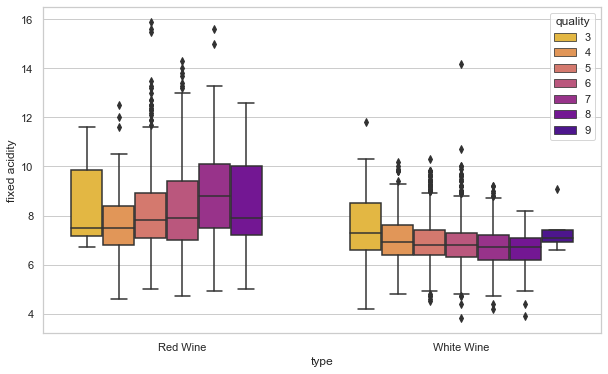

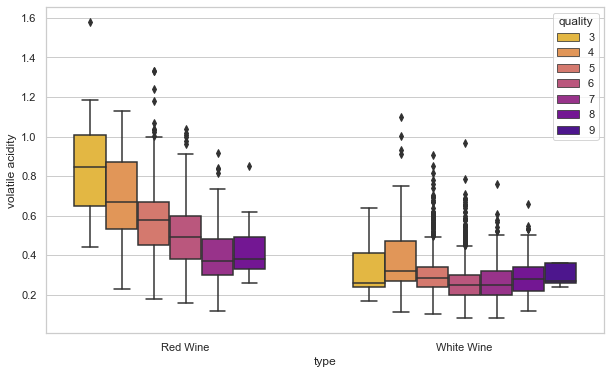

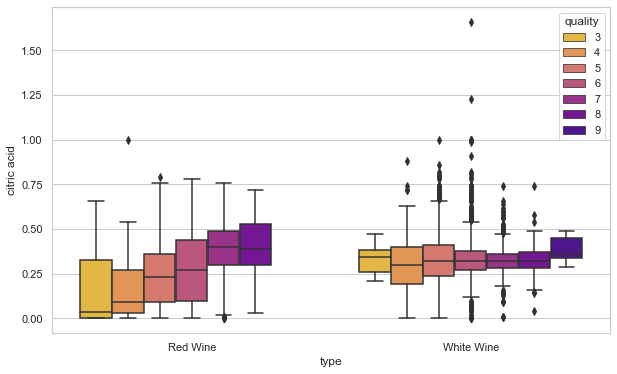

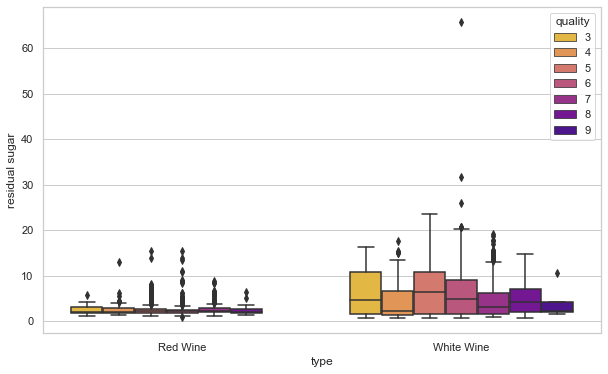

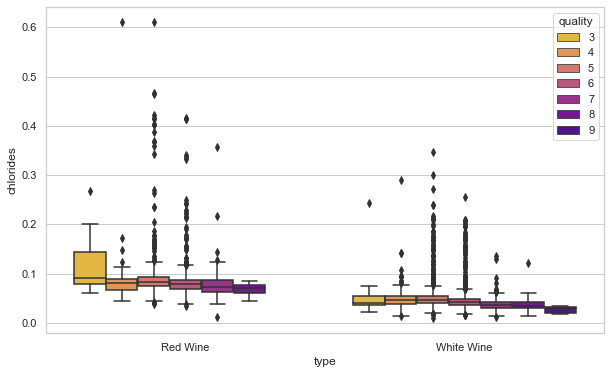

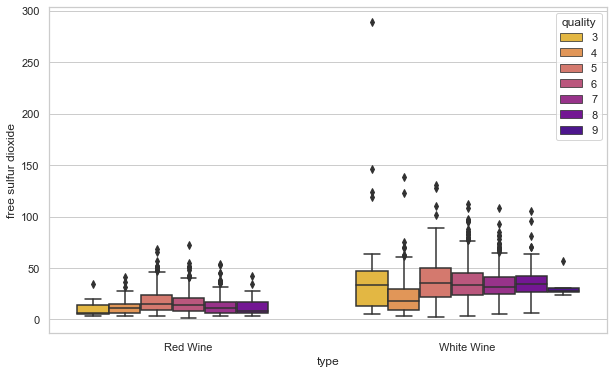

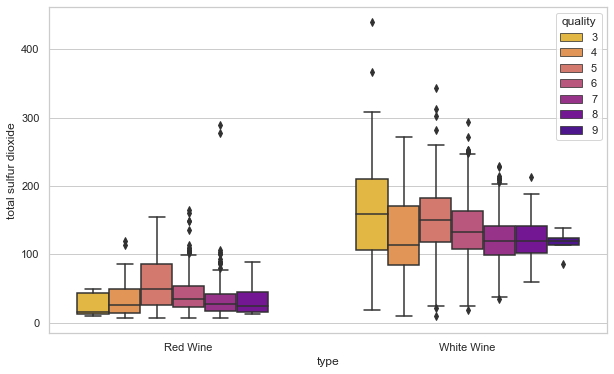

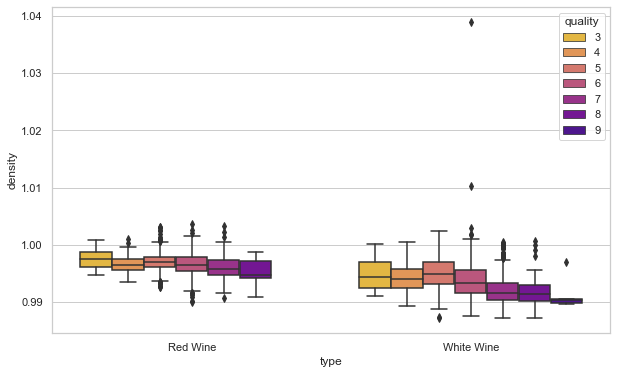

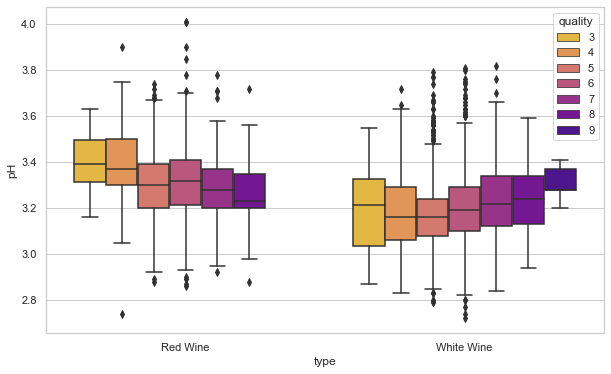

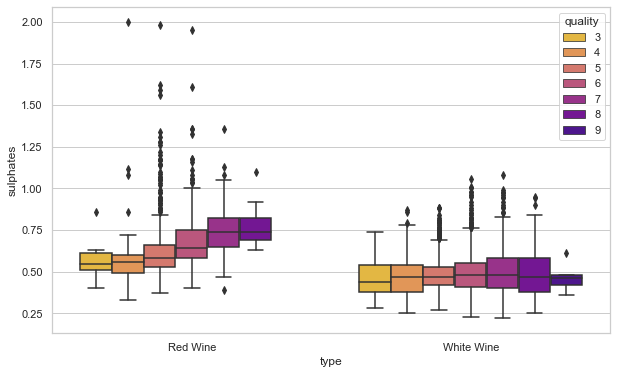

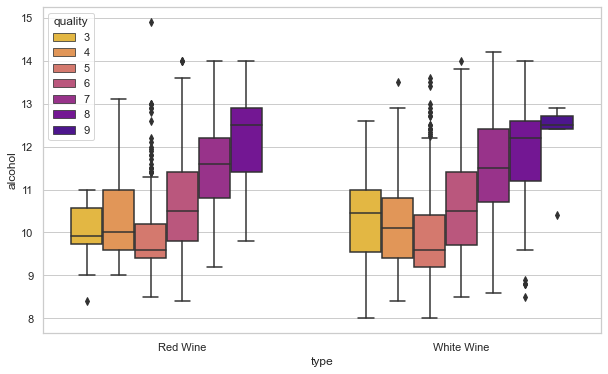

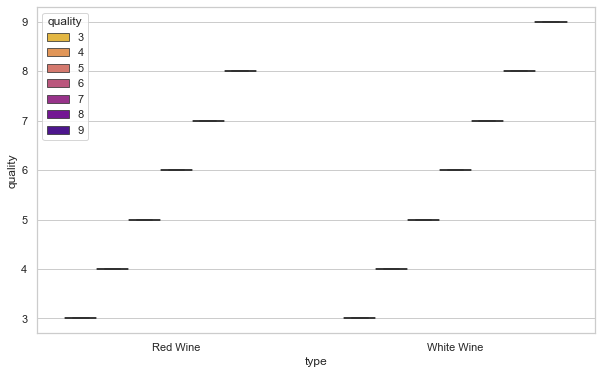

In [75]:
# Boxplot para avaliação em função da qualidade
variaveis = df_wine.columns.tolist()

for i in variaveis[:-1]:
    plt.figure(figsize=(10,6))
    
    sns.boxplot(data=df, y=i, x='type', hue='quality', palette='plasma_r')
    plt.xticks([0,1],['Red Wine', 'White Wine'])

plt.show()

<font color='blue'   font size='4'> 
    A maioria dos parâmetros possuem outliers, o que exige um posicionamento sobre como trabalhar com eles. Com base nos gráficos de boxplot anteriores, é possível observar que as variáveis apresentam diferença de valores em função do tipo de vinho. Por isso, é importante a verificação dos valores outliers para cada tipo de vinho e não para o conjunto de dados como um todo.
</font>

In [81]:
# Definição dos outliers
Q1_r = df[df['type']==1].quantile(0.25)
Q3_r = df[df['type']==1].quantile(0.75)
IQR_r = Q3_r - Q1_r

Q1_w = df[df['type']==2].quantile(0.25)
Q3_w = df[df['type']==2].quantile(0.75)
IQR_w = Q3_w - Q1_w

outliers =  pd.concat([pd.Series(((df[df['type']==1] <= (Q1_r - 1.5 * IQR_r)) | (df[df['type']==1] >= (Q3_r + 1.5 * IQR_r))).sum(), name='Contagem_red'),
                       pd.Series(((df[df['type']==1] <= (Q1_r - 1.5 * IQR_r)) | (df[df['type']==1] >= (Q3_r + 1.5 * IQR_r))).sum()*100/df.shape[0], name='Porcentagem_red'),
                       pd.Series(((df[df['type']==2] <= (Q1_w - 1.5 * IQR_w)) | (df[df['type']==2] >= (Q3_w + 1.5 * IQR_w))).sum(), name='Contagem_white'),
                       pd.Series(((df[df['type']==2] <= (Q1_w - 1.5 * IQR_w)) | (df[df['type']==2] >= (Q3_w + 1.5 * IQR_w))).sum()*100/df.shape[0], name='Porcentagem_white')], axis=1)

red_mask = (df[df['type']==1] < (Q1_r - 1.5 * IQR_r)) | (df[df['type']==1] > (Q3_r + 1.5 * IQR_r))
white_mask = (df[df['type']==2] < (Q1_w - 1.5 * IQR_w)) | (df[df['type']==2] > (Q3_w + 1.5 * IQR_w))
outliers_mask = pd.concat([red_mask, white_mask], axis=0)

df_semOut = df[~outliers_mask]

print(" Número de outliers e Porcentagem em relação ao número de dados totais de cada variável")
outliers 

 Número de outliers e Porcentagem em relação ao número de dados totais de cada variável


Contagem_red  Porcentagem_red  Contagem_white  \
fixed acidity                   41         0.770677             131   
volatile acidity                19         0.357143             143   
citric acid                      1         0.018797             223   
residual sugar                 126         2.368421              16   
chlorides                       87         1.635338             178   
free sulfur dioxide             29         0.545113              48   
total sulfur dioxide            45         0.845865              15   
density                         35         0.657895               6   
pH                              28         0.526316              46   
sulphates                       55         1.033835              96   
alcohol                         13         0.244361               0   
quality                         27         0.507519             156   
type                          1359        25.545113            3961   

                      Porcentagem_white  
fixed acidity                  2.462406  
volatile acidity               2.687970  
citric acid                    4.191729  
residual sugar                 0.300752  
chlorides                      3.345865  
free sulfur dioxide            0.902256  
total sulfur dioxide           0.281955  
density                        0.112782  
pH                             0.864662  
sulphates                      1.804511  
alcohol                        0.000000  
quality                        2.932331  
type                          74.454887

<AxesSubplot:>

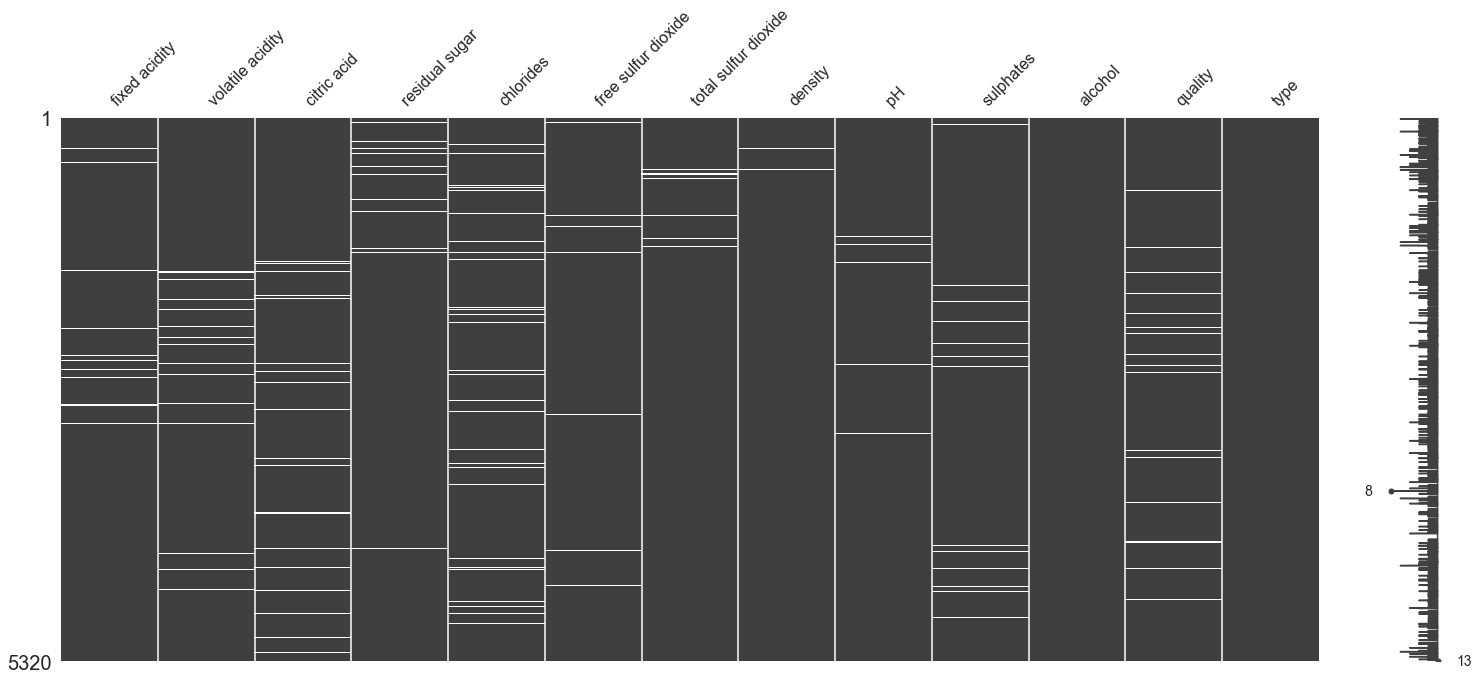

In [83]:
# Visualização dos dados outliers deletados

msno.matrix(df_semOut) 

<AxesSubplot:>

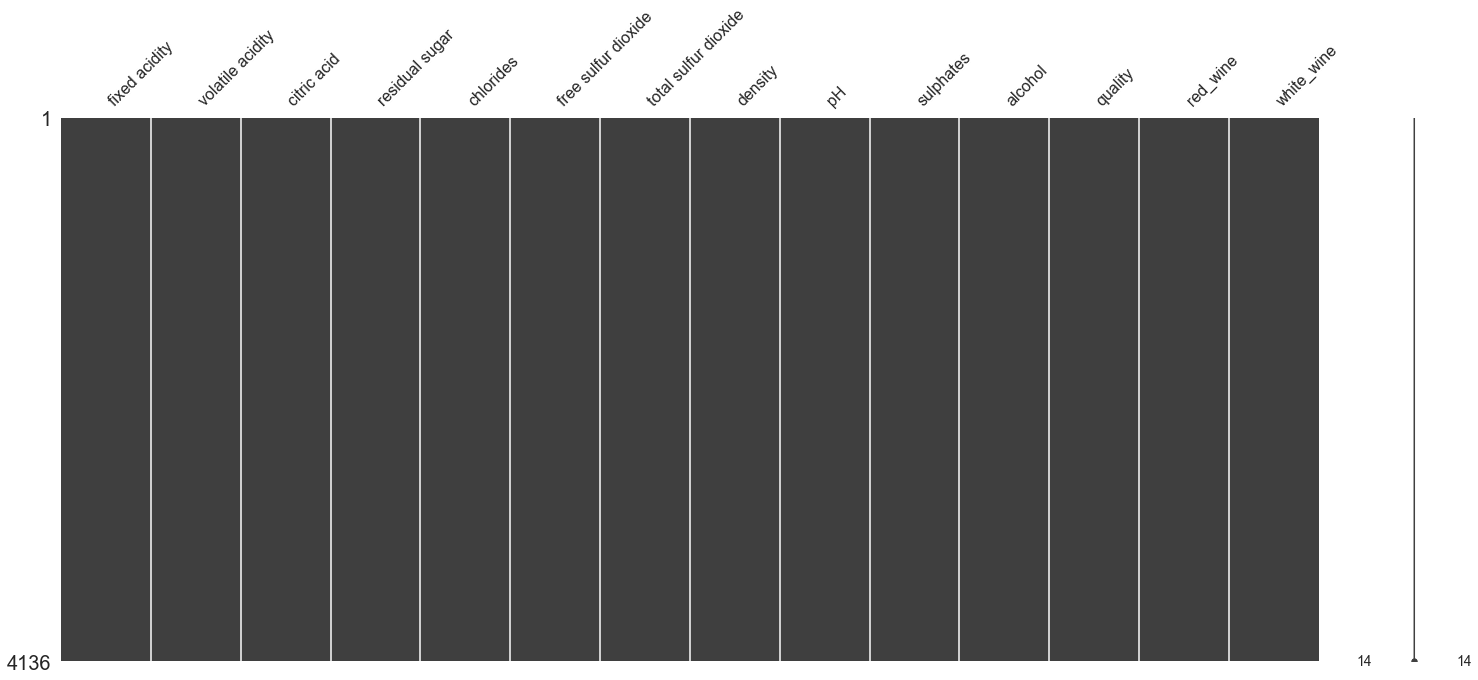

In [103]:
# Apagando os dados NAN
df_semOut = df_semOut.dropna(axis=0)

# Visualização dos dados após eliminar os NANs
msno.matrix(df_semOut)

In [ ]:
# transformar em dummies os tipos de vinho
df = pd.get_dummies(df, prefix_sep='_', columns=['type'])
df = df.rename(columns={'type_1': 'red_wine', 'type_2': 'white_wine'})

df_semOut = pd.get_dummies(df_semOut, prefix_sep='_', columns=['type'])
df_semOut = df_semOut.rename(columns={'type_1': 'red_wine', 'type_2': 'white_wine'})

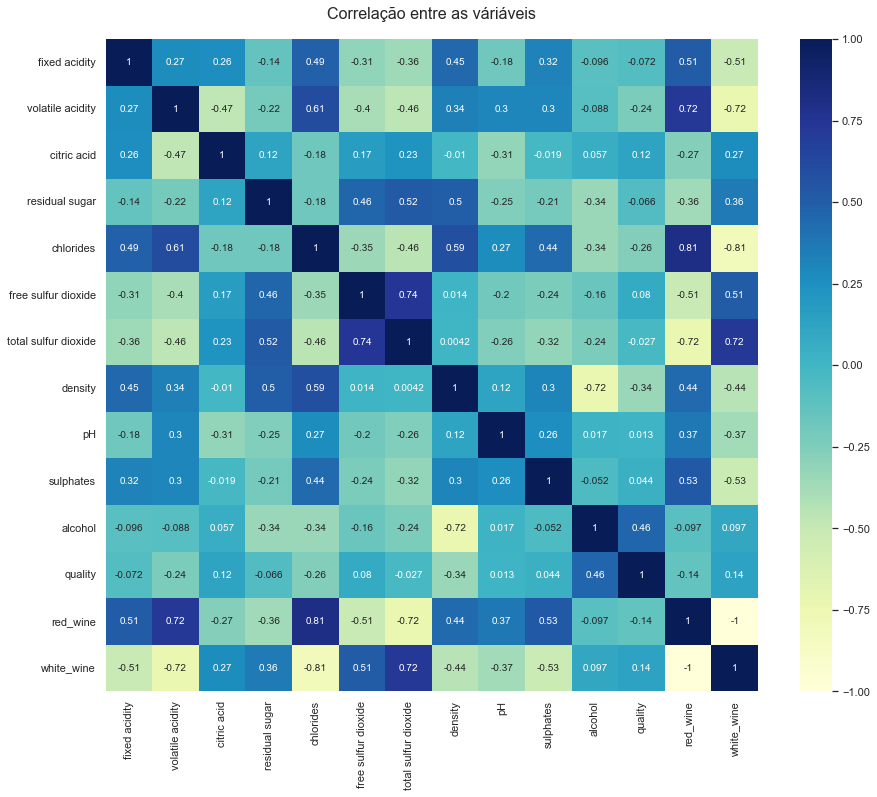

In [108]:
# Mapa de calor para visualização das correlações após transformar coluna tipo de vinho em dummies
plt.figure(figsize= (15,12))
sns.heatmap(df_semOut.corr(), square=True , annot = True,cmap="YlGnBu")
plt.title('Correlação entre as váriáveis', pad=20, size=16)
plt.show()

---

### Etapa 2
**Regressão Linear**  

Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado  

In [89]:
# Base completa
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'red_wine', 'white_wine']]
y = df['quality']

Coeficientes angulares:  [ 5.14233787e-02 -1.30653384e+00  1.69091969e-01  4.70769160e-02
 -1.08573990e+00  5.81039945e-03 -1.81066398e-03 -8.03971041e+01
  4.74662450e-01  8.31836571e-01  2.47358841e-01  1.25505243e-01
 -1.25505243e-01]
Intercepto:  81.11261535903577
------------------------------------------------------------------------------------------
Avaliação do modelo
R2:  0.3149956658969535
MAE:  0.09781067078510049
MSE:  0.01559739502657775
RMSE:  0.12488953129297008


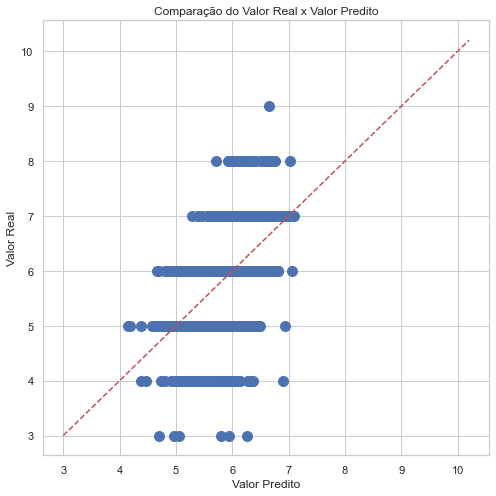

In [90]:
# Dividindo a base em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# criando o objeto de regressão
model = LinearRegression() 

# Treinando a regressão
model.fit(X_train, y_train) 

# Predizendo os valores com base no modelo treinado
y_pred = model.predict(X_test)

# Apresentando os coeficientes da regressão calculada
print('Coeficientes angulares: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Avaliando os resultados do modelo
print("---"*30)
print('Avaliação do modelo')
print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred)/y_test.mean())
print("MSE: ", mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)/y_test.mean()**2))

# Visualização dos Valores Reais com os preditos
fig =plt.figure(figsize=(8,8))
l=plt.plot(y_pred,y_test,'bo')
plt.setp(l,markersize=10)
plt.setp(l,markerfacecolor='C0')
plt.title('Comparação do Valor Real x Valor Predito',fontsize=12)
plt.ylabel ("Valor Real",fontsize=12)
plt.xlabel("Valor Predito",fontsize=12)

#Mostra  valores preditos e originais
xl=np.arange(min(y_test),1.2 *max(y_test),(max(y_test)-min(y_test))/10)
yl=xl
plt.plot(xl,yl,'r--')
plt.show()

In [91]:
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

Features     Scores
0              sulphates   0.831837
1                     pH   0.474662
2                alcohol   0.247359
3            citric acid   0.169092
4               red_wine   0.125505
5          fixed acidity   0.051423
6         residual sugar   0.047077
7    free sulfur dioxide   0.005810
8   total sulfur dioxide  -0.001811
9             white_wine  -0.125505
10             chlorides  -1.085740
11      volatile acidity  -1.306534
12               density -80.397104

---

In [92]:
# Descartando algumas variáveis
# Base completa
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'red_wine', 'white_wine']]
y = df['quality']

Coeficientes angulares:  [ 5.47613844e-02 -1.42686724e+00  1.37165417e-01  5.29912110e-02
 -9.60493670e-01 -9.34393467e+01  5.00098306e-01  8.16868772e-01
  2.41526444e-01  1.88863277e-01 -1.88863277e-01]
Intercepto:  94.06109114846916
------------------------------------------------------------------------------------------
Avaliação do modelo
R2:  0.3099371387873713
MAE:  0.09800126622791507
MSE:  0.0157125765541284
RMSE:  0.12534981672953655


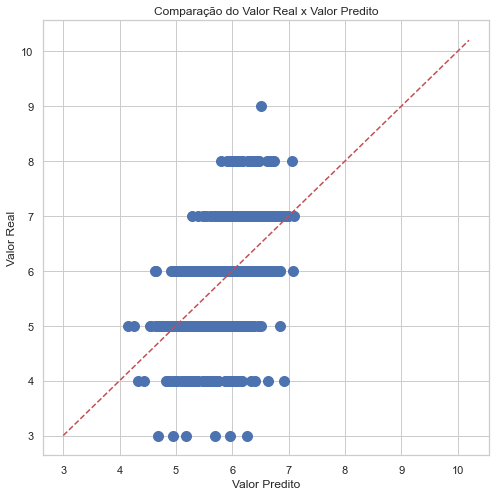

In [93]:
# Dividindo a base em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# criando o objeto de regressão
model = LinearRegression() 

# Treinando a regressão
model.fit(X_train, y_train) 

# Predizendo os valores com base no modelo treinado
y_pred = model.predict(X_test)

# Apresentando os coeficientes da regressão calculada
print('Coeficientes angulares: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Avaliando os resultados do modelo
print("---"*30)
print('Avaliação do modelo')
print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred)/y_test.mean())
print("MSE: ", mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)/y_test.mean()**2))

# Visualização dos Valores Reais com os preditos
fig =plt.figure(figsize=(8,8))
l=plt.plot(y_pred,y_test,'bo')
plt.setp(l,markersize=10)
plt.setp(l,markerfacecolor='C0')
plt.title('Comparação do Valor Real x Valor Predito',fontsize=12)
plt.ylabel ("Valor Real",fontsize=12)
plt.xlabel("Valor Predito",fontsize=12)

#Mostra  valores preditos e originais
xl=np.arange(min(y_test),1.2 *max(y_test),(max(y_test)-min(y_test))/10)
yl=xl
plt.plot(xl,yl,'r--')
plt.show()


In [94]:
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

Features     Scores
0          sulphates   0.816869
1                 pH   0.500098
2            alcohol   0.241526
3           red_wine   0.188863
4        citric acid   0.137165
5      fixed acidity   0.054761
6     residual sugar   0.052991
7         white_wine  -0.188863
8          chlorides  -0.960494
9   volatile acidity  -1.426867
10           density -93.439347

---

In [95]:
# Base sem Outliers
X = df_semOut[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'red_wine', 'white_wine']]
y = df_semOut['quality']

Coeficientes angulares:  [ 1.26627990e-01 -1.06036210e+00 -2.74604854e-02  5.69888749e-02
 -2.12585028e+00  7.74224750e-03 -1.44370262e-03 -1.21327695e+02
  9.06308117e-01  1.04549701e+00  1.64077576e-01  1.39211610e-01
 -1.39211610e-01]
Intercepto:  120.54214115686919
------------------------------------------------------------------------------------------
Avaliação do modelo
R2:  0.28337563551236167
MAE:  0.09024180921941577
MSE:  0.01258430091889879
RMSE:  0.11217977054219175


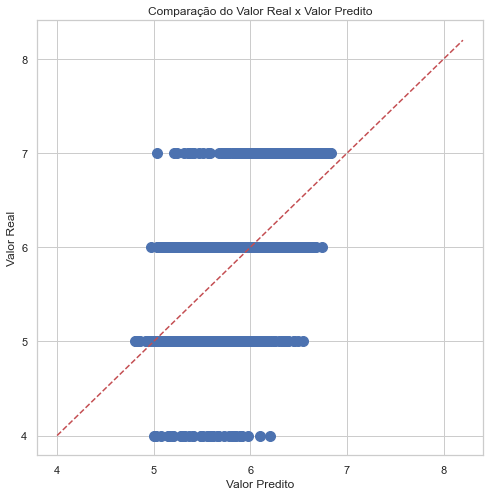

In [96]:
# Dividindo a base em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

# criando o objeto de regressão
model = LinearRegression() 

# Treinando a regressão
model.fit(X_train, y_train) 

# Predizendo os valores com base no modelo treinado
y_pred = model.predict(X_test)

# Apresentando os coeficientes da regressão calculada
print('Coeficientes angulares: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Avaliando os resultados do modelo
print("---"*30)
print('Avaliação do modelo')
print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred)/y_test.mean())
print("MSE: ", mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)/y_test.mean()**2))

# Visualização dos Valores Reais com os preditos
fig =plt.figure(figsize=(8,8))
l=plt.plot(y_pred,y_test,'bo')
plt.setp(l,markersize=10)
plt.setp(l,markerfacecolor='C0')
plt.title('Comparação do Valor Real x Valor Predito',fontsize=12)
plt.ylabel ("Valor Real",fontsize=12)
plt.xlabel("Valor Predito",fontsize=12)

#Mostra  valores preditos e originais
xl=np.arange(min(y_test),1.2 *max(y_test),(max(y_test)-min(y_test))/10)
yl=xl
plt.plot(xl,yl,'r--')
plt.show()


In [97]:
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

Features      Scores
0              sulphates    1.045497
1                     pH    0.906308
2                alcohol    0.164078
3               red_wine    0.139212
4          fixed acidity    0.126628
5         residual sugar    0.056989
6    free sulfur dioxide    0.007742
7   total sulfur dioxide   -0.001444
8            citric acid   -0.027460
9             white_wine   -0.139212
10      volatile acidity   -1.060362
11             chlorides   -2.125850
12               density -121.327695

In [98]:
# Descartando algumas variáveis
# Base completa
X = df_semOut[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'red_wine', 'white_wine']]
y = df_semOut['quality']

Coeficientes angulares:  [ 1.24067462e-01 -1.19840003e+00 -3.78651366e-02  6.63976443e-02
 -2.05593846e+00 -1.35399547e+02  9.07282697e-01  1.05806929e+00
  1.52242983e-01  1.84140534e-01 -1.84140534e-01]
Intercepto:  134.7569759227511
------------------------------------------------------------------------------------------
Avaliação do modelo
R2:  0.2768229832963094
MAE:  0.0906867387601612
MSE:  0.012699368939733733
RMSE:  0.11269147678388873


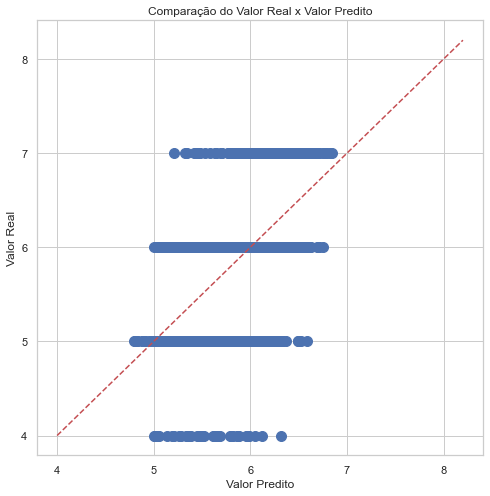

In [99]:
# Dividindo a base em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

# criando o objeto de regressão
model = LinearRegression() 

# Treinando a regressão
model.fit(X_train, y_train) 

# Predizendo os valores com base no modelo treinado
y_pred = model.predict(X_test)

# Apresentando os coeficientes da regressão calculada
print('Coeficientes angulares: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Avaliando os resultados do modelo
print("---"*30)
print('Avaliação do modelo')
print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred)/y_test.mean())
print("MSE: ", mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)/y_test.mean()**2))

# Visualização dos Valores Reais com os preditos
fig =plt.figure(figsize=(8,8))
l=plt.plot(y_pred,y_test,'bo')
plt.setp(l,markersize=10)
plt.setp(l,markerfacecolor='C0')
plt.title('Comparação do Valor Real x Valor Predito',fontsize=12)
plt.ylabel ("Valor Real",fontsize=12)
plt.xlabel("Valor Predito",fontsize=12)

#Mostra  valores preditos e originais
xl=np.arange(min(y_test),1.2 *max(y_test),(max(y_test)-min(y_test))/10)
yl=xl
plt.plot(xl,yl,'r--')
plt.show()


<font color='blue'   font size='4'> 
    Em relação aos resultados gerados, a remoção dos outliers não colaborou com o desempenho do modelo. O melhor R2 observado foi obtido com a base completa e com todas as variáveis. A seleção de variáves também não melhorou o resultado.  
</font>

---

### Etapa 3
**Regressão logística**

Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado  

In [109]:
# Base completa
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'red_wine', 'white_wine']]
y = df['quality']

<Figure size 576x576 with 0 Axes>

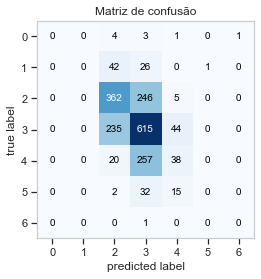

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        69
           5       0.54      0.59      0.57       613
           6       0.52      0.69      0.59       894
           7       0.37      0.12      0.18       315
           8       0.00      0.00      0.00        49
           9       0.00      0.00      0.00         1

    accuracy                           0.52      1950
   macro avg       0.20      0.20      0.19      1950
weighted avg       0.47      0.52      0.48      1950



In [120]:
# Dividindo a base em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

# criando o objeto de regressão logística
model = LogisticRegression(max_iter = 1000)

# Treinando a regressão
model.fit(X_train, y_train) 

# Predizendo os valores com base no modelo treinado
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualização da matriz de confusão
fig =plt.figure(figsize=(8,8))
plot_confusion_matrix(conf_mat=cm)
plt.title('Matriz de confusão',fontsize=12)

plt.show()

#Apresentando estatística dos dados
print(classification_report(y_test, y_pred))



---

In [121]:
# Base sem Outliers
X = df_semOut[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'red_wine', 'white_wine']]
y = df_semOut['quality']

<Figure size 576x576 with 0 Axes>

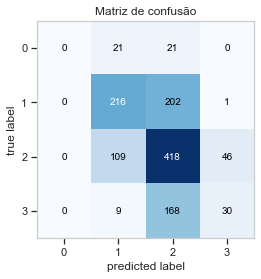

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        42
         5.0       0.61      0.52      0.56       419
         6.0       0.52      0.73      0.60       573
         7.0       0.39      0.14      0.21       207

    accuracy                           0.54      1241
   macro avg       0.38      0.35      0.34      1241
weighted avg       0.51      0.54      0.50      1241



In [122]:
# Dividindo a base em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

# criando o objeto de regressão logística
model = LogisticRegression(max_iter = 1000)

# Treinando a regressão
model.fit(X_train, y_train) 

# Predizendo os valores com base no modelo treinado
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualização da matriz de confusão
fig =plt.figure(figsize=(8,8))
plot_confusion_matrix(conf_mat=cm)
plt.title('Matriz de confusão',fontsize=12)

plt.show()

#Apresentando estatística dos dados
print(classification_report(y_test, y_pred))



<font color='blue'   font size='4'> 
    Em relação aos resultados gerados, a remoção dos outliers apresentou desempenho ligeiramente superior em termos de acurácia. 
</font>